# compare BNB - EXTBNB data to all pairs in our overlay sample

In [1]:
import sys; sys.path.insert(0, '../../'); sys.path.insert(0,'../mupClassification/')
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from matplotlib.pylab import *
import matplotlib.patches as patches
%matplotlib inline

OffBeam_scaling: 1.24224698773 = N(on beam)/N(off beam) before sof. trig.
MC_scaling_DATAcosmic: 0.504451038576 = N(POT on beam)/N(POT MC)
MC_scaling_MCcosmic: 0.136225100235 = N(POT on beam)/N(POT MC)


# import data

In [2]:
debug = 1
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/BNBextBNBvsOverlay/'

In [3]:
Nevents

{'MC-BNB/Cosmic-DATA overlay': 96350,
 'MC-BNB/Cosmic-DATA overlay POT': 9.773e+19,
 'MC-BNB/Cosmic-MC overlay': 358800,
 'MC-BNB/Cosmic-MC overlay POT': 3.61901e+20,
 'OffBeam after sof.trig.': 380602,
 'OffBeam before sof.trig.': 8529852.084267145,
 'OffBeam sof.trig. efficiency': 0.04462,
 'OnBeam POT': 4.93e+19,
 'OnBeam after sof.trig.': 544114,
 'OnBeam before sof.trig.': 10596183.05744888,
 'OnBeam sof.trig. efficiency': 0.05135,
 'v04 after sof.trig.': 378787,
 'v05 after sof.trig.': 1815}

## (1) Off-Beam from two samples
the infamous "inconsistent process history" issue
separate the list into two lists 
corresponding to files that were swizzled using v04_26_04_% and v05_08_00_%

In [4]:
OffBeam = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_extbnb_v8_mcc8_v04_26_04_05_v04_vertices.csv')
                     ,pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_extbnb_v8_mcc8_v04_26_04_05_v05_vertices.csv')])
OffBeamFV = sample_in_FV(OffBeam)
print len(OffBeam),'pairs from Off-Beam'
print len(OffBeamFV),'pairs from Off-Beam in FV'

104447 pairs from Off-Beam
64134 pairs from Off-Beam in FV


## (2) On-Beam sample

In [5]:
OnBeam = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_bnb_v8_mcc8_vertices.csv')
OnBeamFV = sample_in_FV(OnBeam)
print len(OnBeam),'pairs from On-Beam'
print len(OnBeamFV),'pairs from On-Beam in FV'

162057 pairs from On-Beam
100379 pairs from On-Beam in FV


## (3) MC-BNB + Cosmic DATA overlay 

In [6]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()
cuts_pureff = apply_cuts_MCbnbDATAcosmic(PIDa_p_min=12,                                                                             
                         delta_Delta_phi=40,                         
                         r_max_RdQ_CC1p0pi=0.33)
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff
pureff_MCbnbDATAcosmic

50939 pairs from MC-BNB + cosmic DATA overlay
30377 pairs in FV
3814 are 1mu-1p, 12.6%
4001 are other pairs, 13.2%
22562 are cosmic, 74.3%
--------------------------------------------------------------
1234 are CC 1p 0pi, 4.1%


$\mu p$ eff. $\mu p$ pur. CC$0\pi 1 p$ eff.  \
no cut                 100.0%        12.6%            100.0%   
PIDa                    79.9%        45.6%             76.1%   
length                  64.0%        59.4%             63.9%   
non-collinearity        58.5%        70.8%             61.4%   
vertex activity         34.2%        78.3%             53.2%   
delta phi               24.1%        87.7%             47.9%   
theta_pq                17.5%        95.4%             39.4%   
soft Pt                 20.2%        94.6%             42.9%   
soft Pmiss              16.3%        95.4%             37.3%   
tight Pt                 9.3%        95.7%             22.4%   
PIDa-                   83.3%        43.5%             79.4%   
PIDa+                   75.4%        46.8%             71.1%   
theta12-                56.3%        72.2%             60.2%   
theta12+                60.4%        70.0%             62.6%   
RdQ-                    32.8%        78.9%             51.6%   
RdQ+                    35.9%        76.6%             54.1%   
delta_phi-              23.0%        88.9%             46.9%   
delta_phi+              25.1%        87.3%             48.6%   
Pt-                     18.3%        94.7%             40.4%   
Pt+                     21.3%        94.4%             44.7%   

                 CC$0\pi 1 p$ pur.  \
no cut                        4.1%   
PIDa                         14.0%   
length                       19.2%   
non-collinearity             24.0%   
vertex activity              39.4%   
delta phi                    56.3%   
theta_pq                     69.4%   
soft Pt                      65.1%   
soft Pmiss                   70.7%   
tight Pt                     74.9%   
PIDa-                        13.4%   
PIDa+                        14.3%   
theta12-                     25.0%   
theta12+                     23.5%   
RdQ-                         40.1%   
RdQ+                         37.3%   
delta_phi-                   58.7%   
delta_phi+                   54.7%   
Pt-                          67.7%   
Pt+                          64.1%   

                                                              label  \
no cut                                                       no cut   
PIDa                                                   ${PID}_a>12$   
length                                              $l_{\mu}>l_{p}$   
non-collinearity                         $|\theta_{1,2}-90^0|<60^0$   
vertex activity   $\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...   
delta phi                                $|\Delta \phi - \pi|<40^0$   
theta_pq                                         $\theta_{pq}<25^0$   
soft Pt                                          $p_{t}<0.35$ GeV/c   
soft Pmiss                                    $p_{miss}<0.30$ GeV/c   
tight Pt                                         $p_{t}<0.15$ GeV/c   
PIDa-                                                  ${PID}_a>11$   
PIDa+                                                  ${PID}_a>13$   
theta12-                                 $|\theta_{1,2}-90^0|<55^0$   
theta12+                                 $|\theta_{1,2}-90^0|<65^0$   
RdQ-              $\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...   
RdQ+              $\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...   
delta_phi-                               $|\Delta \phi - \pi|<35^0$   
delta_phi+                               $|\Delta \phi - \pi|<45^0$   
Pt-                                              $p_{t}<0.30$ GeV/c   
Pt+                                              $p_{t}<0.40$ GeV/c   

                         1mu-1p    other pairs          cosmic      CC 1p 0pi  
no cut            100.0% (3814)  100.0% (4001)  100.0% (22562)  100.0% (1234)  
PIDa               79.9% (3046)   38.4% (1536)     9.3% (2102)    76.1% (939)  
length             64.0% (2440)    20.3% (812)      3.8% (855)    63.9% (789)  
non-collinearity   58.5% (2231)    14.2% (570)      1.6% (351

In [7]:
reduced_OffBeam = dict()
reduced_OnBeam = dict()

reduced_OffBeam['no cut'] = OffBeamFV
reduced_OnBeam['no cut'] = OnBeamFV

# cut 1: PIDa
PIDaCut = 12
sam = reduced_OffBeam['no cut']
reduced_OffBeam['PIDa'] = sam[sam['PIDa_assigned_proton']>PIDaCut]
sam = reduced_OnBeam['no cut']
reduced_OnBeam['PIDa'] = sam[sam['PIDa_assigned_proton']>PIDaCut]


# cut 2: require that the longer track is the one with larger PIDa
sam = reduced_OffBeam['PIDa']
reduced_OffBeam['length'] = sam[sam['PIDa_long'] < sam['PIDa_short']]
sam = reduced_OnBeam['PIDa']
reduced_OnBeam['length'] = sam[sam['PIDa_long'] < sam['PIDa_short']]


# cut 3: |\theta_{1,2}-90^0|<60^0$
theta_12_cut = 60
sam = reduced_OffBeam['length']
reduced_OffBeam['non-collinearity'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]
sam = reduced_OnBeam['length']
reduced_OnBeam['non-collinearity'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]


# cut 4: vertex activity
opt_box=(50,100)
box_str='[%d wires x %d ticks]'%(opt_box[0],opt_box[1])
Ru = 'RdQaroundVertex[plane 0]'+box_str
Rv = 'RdQaroundVertex[plane 1]'+box_str
Ry = 'RdQaroundVertex[plane 2]'+box_str    
reduced_MCbnbDATAcosmic = dict()
r_max_RdQ_CC1p0pi = 0.33
sam = reduced_OffBeam['non-collinearity']
reduced_OffBeam['vertex activity'] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                                         | 
                                         (np.sqrt( np.square(sam[Ru]-1) 
                                                  + np.square(sam[Rv]-1) 
                                                  + np.square(sam[Ry]-1) ) <= r_max_RdQ_CC1p0pi) ]
sam = reduced_OnBeam['non-collinearity']
reduced_OnBeam['vertex activity'] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                                         | 
                                         (np.sqrt( np.square(sam[Ru]-1) 
                                                  + np.square(sam[Rv]-1) 
                                                  + np.square(sam[Ry]-1) ) <= r_max_RdQ_CC1p0pi) ]


# cut 5: \Delta \phi
delta_Delta_phi = 40
sam = reduced_OffBeam['vertex activity']
reduced_OffBeam['delta phi'] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]
sam = reduced_OnBeam['vertex activity']
reduced_OnBeam['delta phi'] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]


# modified cut 6: $p_{t}<0.35$
Pt_max = 0.35
sam = reduced_OffBeam['delta phi']
reduced_OffBeam['soft Pt'] = sam[sam['reco_Pt']<Pt_max]
sam = reduced_OnBeam['delta phi']
reduced_OnBeam['soft Pt'] = sam[sam['reco_Pt']<Pt_max]

# lets get to buissiness

# before any cut

In [8]:
def pure_cosmic(cosmic_in_overlay):
    return (cosmic_in_overlay[(cosmic_in_overlay['pdg_long']==-9999)&(cosmic_in_overlay['pdg_short']==-9999)])

In [22]:

# -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- -
# Nov-9,2017
def extBNBvsCosmicOverlay(OffBeamSample=None,OffBeamFV=None
                            , var='PIDa_assigned_proton' , x_label='$PID_a^p$' 
                            , bins=np.linspace(0,30,31) 
                            , ax=None, figsize=(14,6),fontsize=25
                            , color='purple'
                            , do_add_cosmic_overlay=True , cosmic_overlay_sample=None
                            , do_add_legend=True , legend_loc='best', overlay_alpha=0.5):
    bin_width = bins[1]-bins[0]
    if ax is None: fig,ax=plt.subplots(figsize=figsize)
    x = OffBeamSample[var]
    h_OffBeam,edges = np.histogram( x , bins=bins )
    h_OffBeam_err = np.sqrt(h_OffBeam)
    Int_OffBeam = np.sum([h_OffBeam[i]*bin_width for i in range(len(h_OffBeam))])
    
    plt.errorbar( x = bins[:-1], xerr=bin_width/2.
                 , y=h_OffBeam , yerr=h_OffBeam_err
                 , fmt='o', color=color , ecolor='black'
                 , label='extBNB (%d=%.1f'%(len(OffBeamSample),100*float(len(OffBeamSample))/len(OffBeamFV))+'%)'
                )
    plt.plot([0,0],[0,0],'--',color='black',linewidth=2)
    
    if do_add_cosmic_overlay:        
        plot_cosmic_overlay( ax=ax                               
                            , cosmic_overlay_sample = cosmic_overlay_sample , var=var, bins=bins 
                            , Int_OffBeam = Int_OffBeam
                            , alpha=overlay_alpha)
    set_axes(ax,x_label=x_label,y_label='counts',do_add_grid=True,fontsize=fontsize
             ,xlim=(np.min(bins)-bin_width,np.max(bins)+bin_width)
    #              ,ylim=(0,1.05*np.max(h_OffBeam))
            )
    if do_add_legend: 
        if legend_loc=='bbox':
            leg=plt.legend(bbox_to_anchor=(1.,1.05),fontsize=fontsize,loc=2)
        else:
            leg=plt.legend(fontsize=fontsize,loc=legend_loc)
    plt.tight_layout()
    return ax,leg
# -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- -


# -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- -
# Nov-9,2017
def plot_cosmic_overlay( ax=None, cosmic_overlay_sample=None, var=None, bins=None
                        , alpha=0.5, Int_OffBeam=1):
    x = cosmic_overlay_sample[var]
    bin_width = bins[1]-bins[0]
        
    h_overlay,edges = np.histogram( x , bins=bins )
    Int_overlay = np.sum([h_overlay[i]*bin_width for i in range(len(h_overlay))])
    SUMoverlay = np.sum(h_overlay)    

    cosmic_overlay_scaling = Int_OffBeam/Int_overlay    
    ax.hist( x , weights=cosmic_overlay_scaling*np.ones(len(x))
                     , bins=bins-0.5*bin_width, width=bin_width
                     , color=MCcolors[2]
                     , label='cosmic overlay (%d=%.1f'%(len(cosmic_overlay_sample),100*float(len(cosmic_overlay_sample))/len(MCbnbDATAcosmicSamples['cosmic']))+'%)'
                     , alpha=alpha)       
# -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- -        



# -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- -
# Nov-20,2017
def plot_stacked_MCsamples( ax=None, MCsamples = None , MC_scaling=MC_scaling_DATAcosmic, MCbnbDATAcosmicSamples=None
                           , var=None, bins=None , N_OnBeam_minus_OffBeam=1, alpha=0.8):
    Nall_pairs = len(MCsamples['1mu-1p']+MCsamples['cosmic']+MCsamples['other pairs'])

    x_array, weights_array = [] , []
    label_array , color_array = [] , []
    # stack background (cosmic, other-pairs) + 1mu1p pairs
    for i_pair_type in [2,1,0]:
        pair_type=pair_types[i_pair_type]
        sample = MCsamples[pair_type]; 
        label = MClabels[i_pair_type]+' (%.1f'%(100*float(len(sample))/len(MCbnbDATAcosmicSamples[pair_type]))+'%)'
        label_array.append(label); 
        color_array.append(MCcolors[i_pair_type]);
        x = sample[var]
        x_array.append(x)
        # normalize the MC to have the same number of events as the total On-Off beam sample
        weights_array.append (MC_scaling * np.ones(len(x)) )
        # -- - - - --------- - - -- ---- -  - --- -- -- -- --
    bin_width = bins[1]-bins[0]
    h,bins_arr,_=ax.hist( x_array , weights=weights_array
                     , bins=bins-0.5*bin_width, width=bin_width
                     , stacked=True 
                     , color=color_array
                     , label=label_array
                     , alpha=alpha)            
    h_stack = h[0]+h[1]+h[2]
    if np.max(h[2])>np.max(ax.get_ylim()):
        ax.set_ylim(np.min(ax.get_ylim()),1.05*np.max(h[2]))
        
    # add CC1p0pi as a box inside the 1mu1p 
    sample = MCsamples[pair_types[3]]
    hCC1p0pi,edges = np.histogram( sample[var] , weights=MC_scaling*np.ones(len(sample)) , bins=bins )
    for bin in range(len(bins[:-2])):
        x, dx = bins[bin+1] - 0.4*bin_width, bin_width 
        y, dy = 0.99*h[2][bin+1] - hCC1p0pi[bin], hCC1p0pi[bin]
        label=MClabels[3]+' (%.1f'%(100*float(len(sample))/len(MCbnbDATAcosmicSamples['CC 1p 0pi']))+'%)'
        ax.add_patch( patches.Rectangle( (x, y),dx,dy, facecolor=MCcolors[3],alpha=0.8*alpha,label=label if bin==0 else None))

# -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- -



# -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- -
# Sep-3,2017
def OnBeam_minus_OffBeam_1d( OnBeamSample=None , OffBeamSample=None
                            , var='PIDa_assigned_proton' , x_label='$PID_a^p$' 
                            , bins=np.linspace(0,30,31) 
                            , ax=None, figsize=(14,6),fontsize=25
                            , color='purple'
                            , do_add_MCoverlay=True , MCsamples=None, MCbnbDATAcosmicSamples=None
                            , MC_scaling=MC_scaling_DATAcosmic
                            , do_add_legend=True , legend_loc='best', MCalpha=0.5):
    bin_width = bins[1]-bins[0]
    if ax is None: fig,ax=plt.subplots(figsize=figsize)
    h_OnBeam,edges = np.histogram( OnBeamSample[var] , bins=bins )
    h_OnBeam_err = np.sqrt(h_OnBeam)
    h_OffBeam,edges = np.histogram( OffBeamSample[var] , bins=bins )
    h_OffBeam_err = np.sqrt(h_OffBeam)
    
    h_OnBeam_minus_OffBeam = h_OnBeam - OffBeam_scaling*h_OffBeam
    h_OnBeam_minus_OffBeam_err = np.sqrt( np.square(h_OnBeam_err) + np.square(OffBeam_scaling*h_OffBeam_err)  )
    
    plt.errorbar( x = bins[:-1], xerr=bin_width/2.
                 , y=h_OnBeam_minus_OffBeam , yerr=h_OnBeam_minus_OffBeam_err
                 , fmt='o', color=color , ecolor='black', label='(On-Off) Beam'
                )
    ax.set_xlim(np.min(bins)-bin_width,np.max(bins)+bin_width);
    ax.set_ylim(np.min([0,np.min(h_OnBeam_minus_OffBeam-1.1*h_OnBeam_minus_OffBeam_err)])
                ,np.max(h_OnBeam_minus_OffBeam+1.1*h_OnBeam_minus_OffBeam_err));

    plt.plot([np.min(ax.get_xlim()),np.min(ax.get_xlim())],[0,0],'--',color='black',linewidth=2)
    set_axes(ax,x_label=x_label,y_label='counts',do_add_grid=True,fontsize=fontsize)
    
    if do_add_MCoverlay:        
        N_OnBeam_minus_OffBeam = len(OnBeamSample) - OffBeam_scaling*len(OffBeamSample)
        if debug>1: print 'Number of On-Off:',N_OnBeam_minus_OffBeam

        plot_stacked_MCsamples( ax=ax
                               , MCsamples = MCsamples , MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
                               , var=var, bins=bins , MC_scaling=MC_scaling
                               , N_OnBeam_minus_OffBeam=N_OnBeam_minus_OffBeam , alpha=MCalpha)
    
    if do_add_legend: 
        if legend_loc=='bbox':
            leg=plt.legend(bbox_to_anchor=(1.,1.05),fontsize=fontsize,loc=2)
        else:
            leg=plt.legend(fontsize=fontsize,loc=legend_loc)
    plt.tight_layout()
    return ax,leg
# -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- - -- - - -- -- - -- -



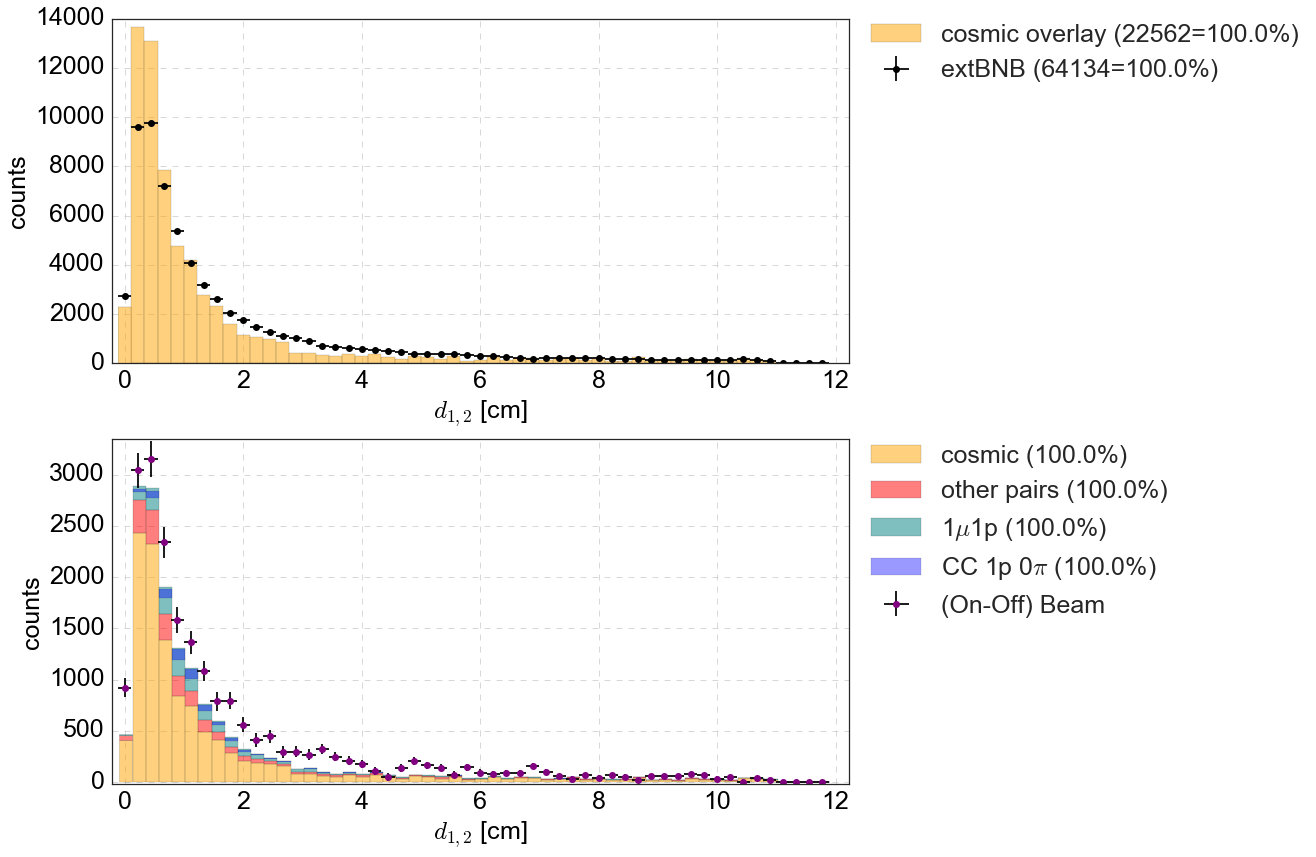

In [23]:
fig = plt.figure(figsize=(12,12))
bins=np.linspace(0,12,55)
var='distance'
x_label = '$d_{1,2}$ [cm]'
ax = fig.add_subplot(2,1,1)
ax,leg=extBNBvsCosmicOverlay(OffBeamSample=reduced_OffBeam['no cut'], OffBeamFV=OffBeamFV
                      ,cosmic_overlay_sample = reduced_MCbnbDATAcosmicSamples['no cut']['cosmic']
                      ,var=var , color='black' ,x_label=x_label, bins=bins , ax=ax, legend_loc='bbox')
ax = fig.add_subplot(2,1,2)
ax,leg=OnBeam_minus_OffBeam_1d(OnBeamSample=reduced_OnBeam['no cut'] 
                        ,OffBeamSample=reduced_OffBeam['no cut'] 
                        ,MCsamples=reduced_MCbnbDATAcosmicSamples['no cut'], MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
                        ,var=var , x_label=x_label ,bins=bins  , ax=ax, legend_loc='bbox')
# plt.tight_layout()
plt.savefig(figures_path+'distance_before_cuts'+'.pdf', bbox_inches='tight')

In [ ]:
for var,x_label,bins in zip(['distance','l_assigned_muon','l_assigned_proton','PIDa_assigned_proton','PIDa_assigned_muon','theta_12','delta_phi','reco_Pt']                                      
                                ,['$d_{1,2}$ [cm]',r'$l_{\mu}$ [cm]',r'$l_{p}$ [cm]',r'$PID_a^{p}$',r'$PID_a^{\mu}$',r'$\theta^{12}$ [deg.]',r'$\Delta \phi$ [deg.]','$p_{t}$ [GeV/c]']
                                ,[np.linspace(0,5,25),np.linspace(0,150,41),np.linspace(0,100,41),np.linspace(0,40,41),np.linspace(0,40,41),np.linspace(0,180,51),np.linspace(0,360,51),np.linspace(-0.01,2,26)]):
    
    fig = plt.figure(figsize=(16,12))

    ax = fig.add_subplot(2,1,1)
    ax,leg=extBNBvsCosmicOverlay(OffBeamSample=reduced_OffBeam['no cut'], OffBeamFV=OffBeamFV
                      ,cosmic_overlay_sample = reduced_MCbnbDATAcosmicSamples['no cut']['cosmic']
                      ,var=var , color='black' ,x_label=x_label, bins=bins , ax=ax, legend_loc='bbox')
    
    ax = fig.add_subplot(2,1,2)
    ax,leg=OnBeam_minus_OffBeam_1d(OnBeamSample=reduced_OnBeam['no cut'] 
                        ,OffBeamSample=reduced_OffBeam['no cut'] 
                        ,MCsamples=reduced_MCbnbDATAcosmicSamples['no cut'], MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
                        ,var=var , x_label=x_label ,bins=bins  , ax=ax, legend_loc='bbox')
    plt.savefig(figures_path+var+'_'+'before_cuts.pdf', bbox_inches='tight') 

# After application of cuts

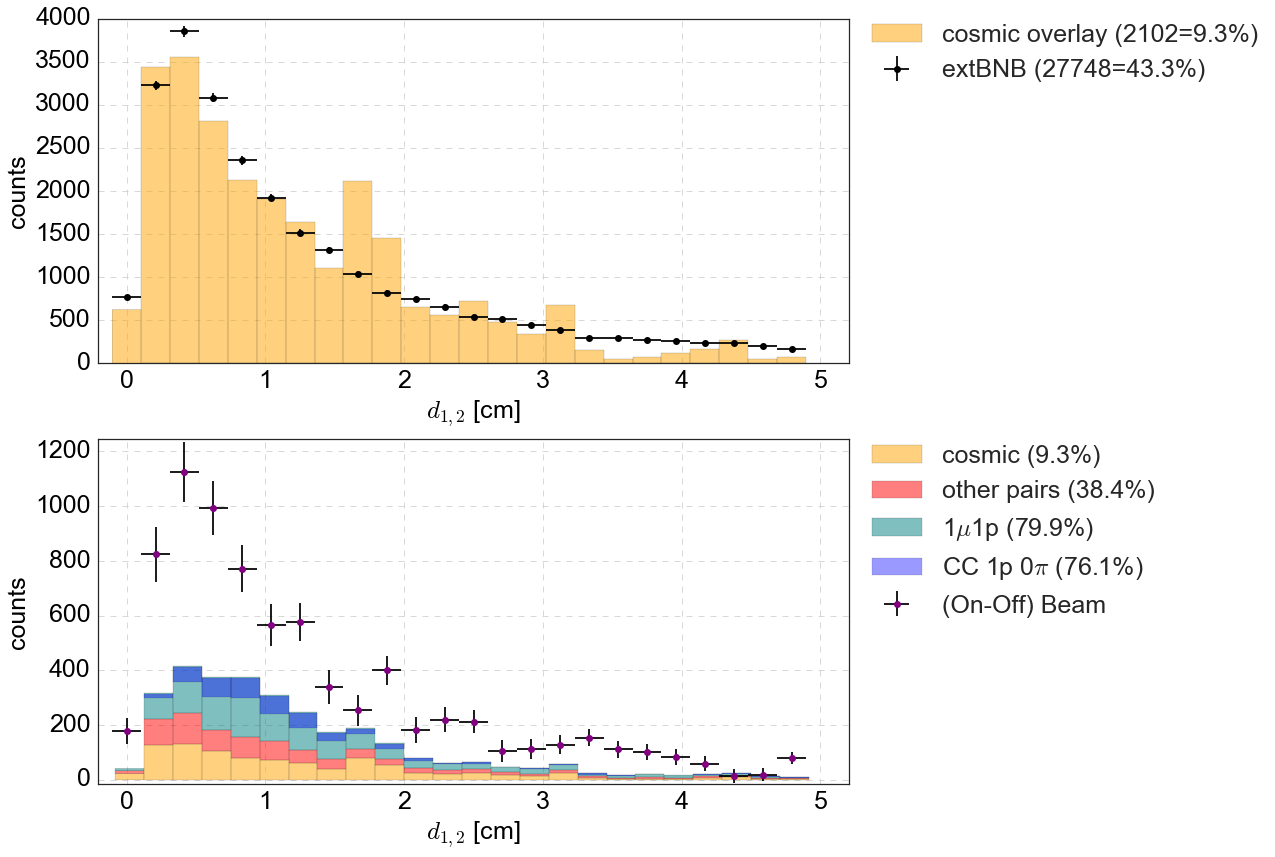

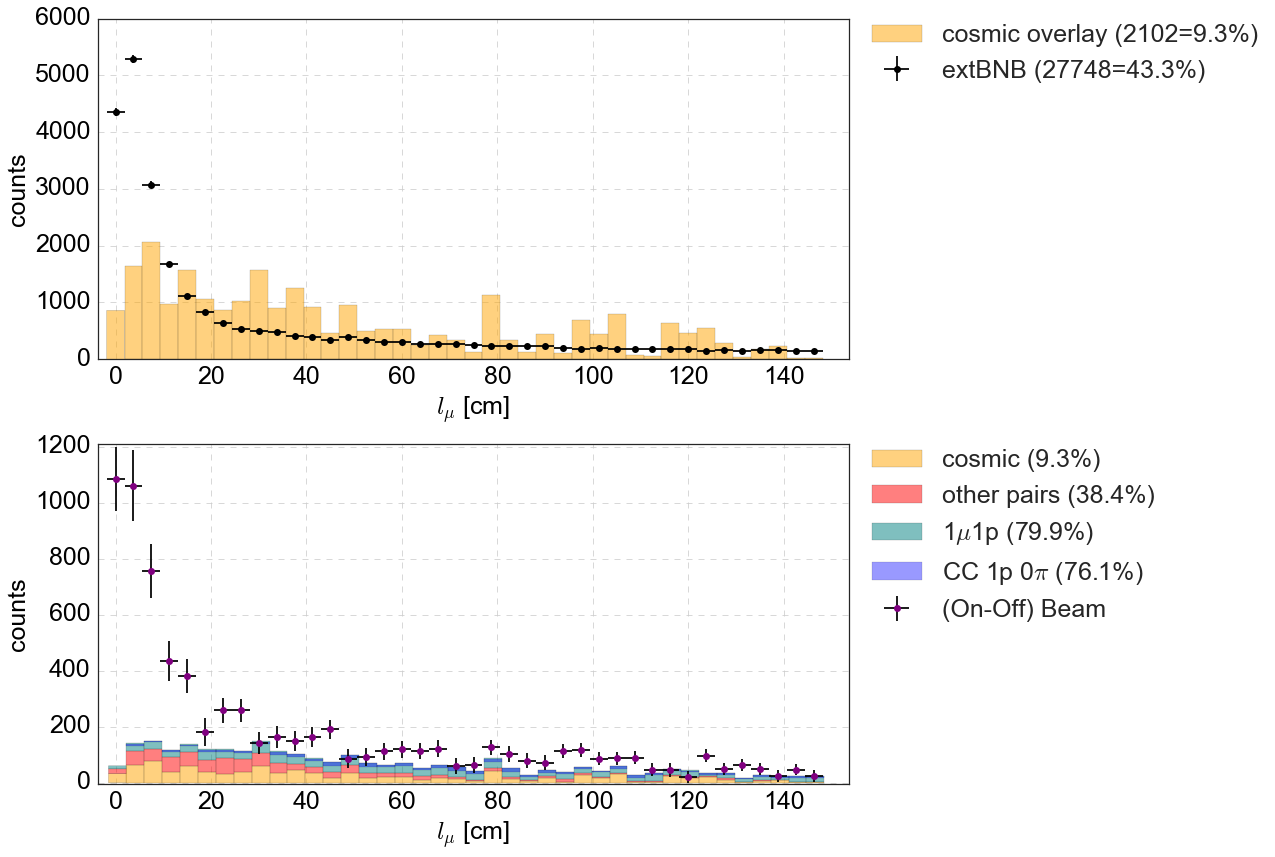

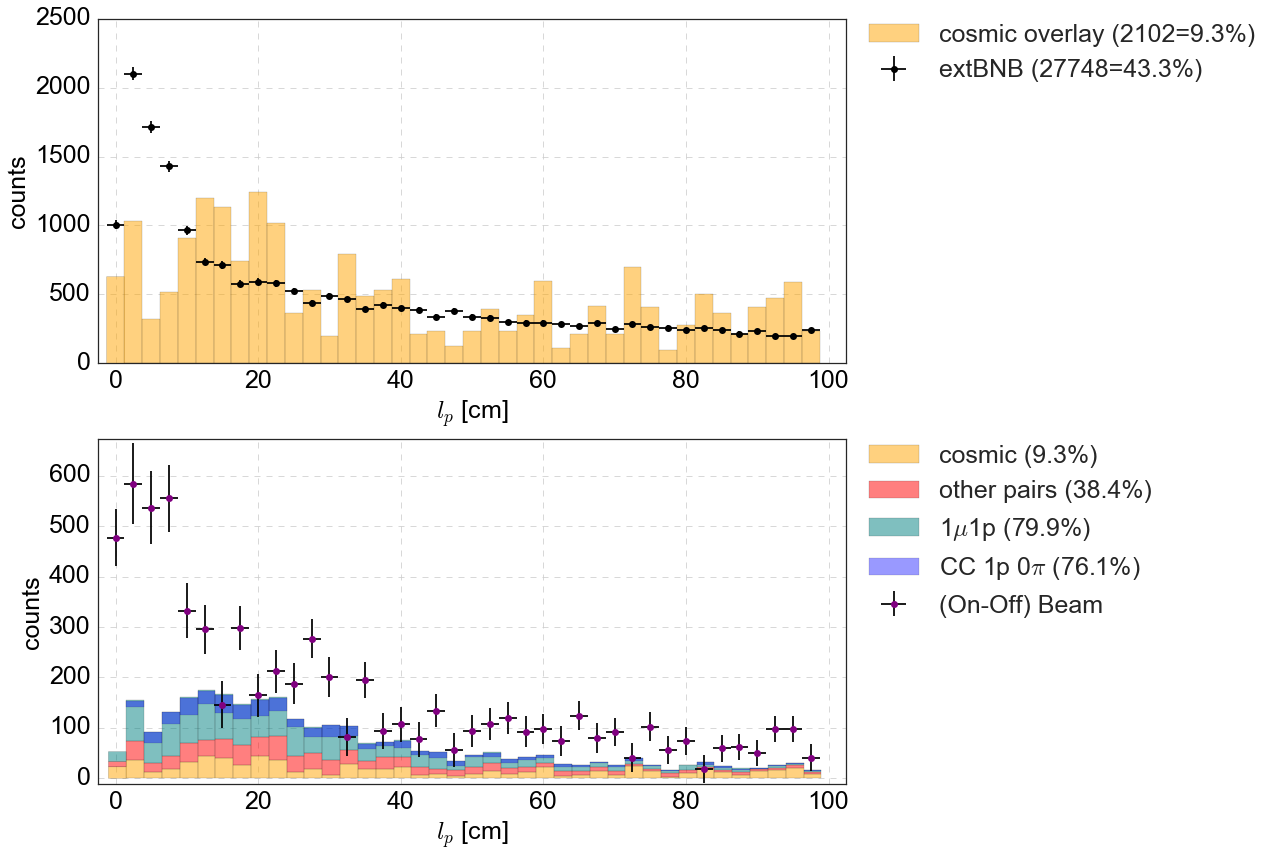

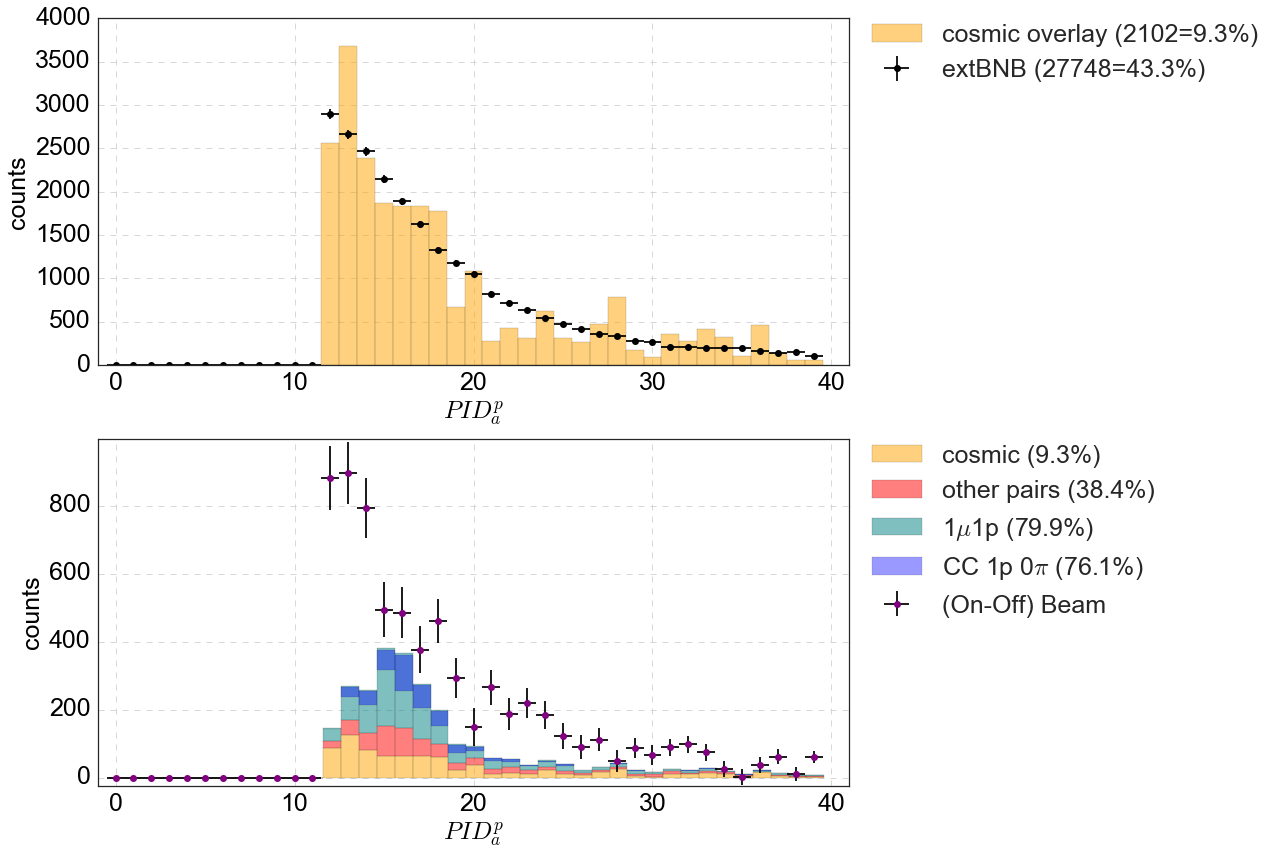

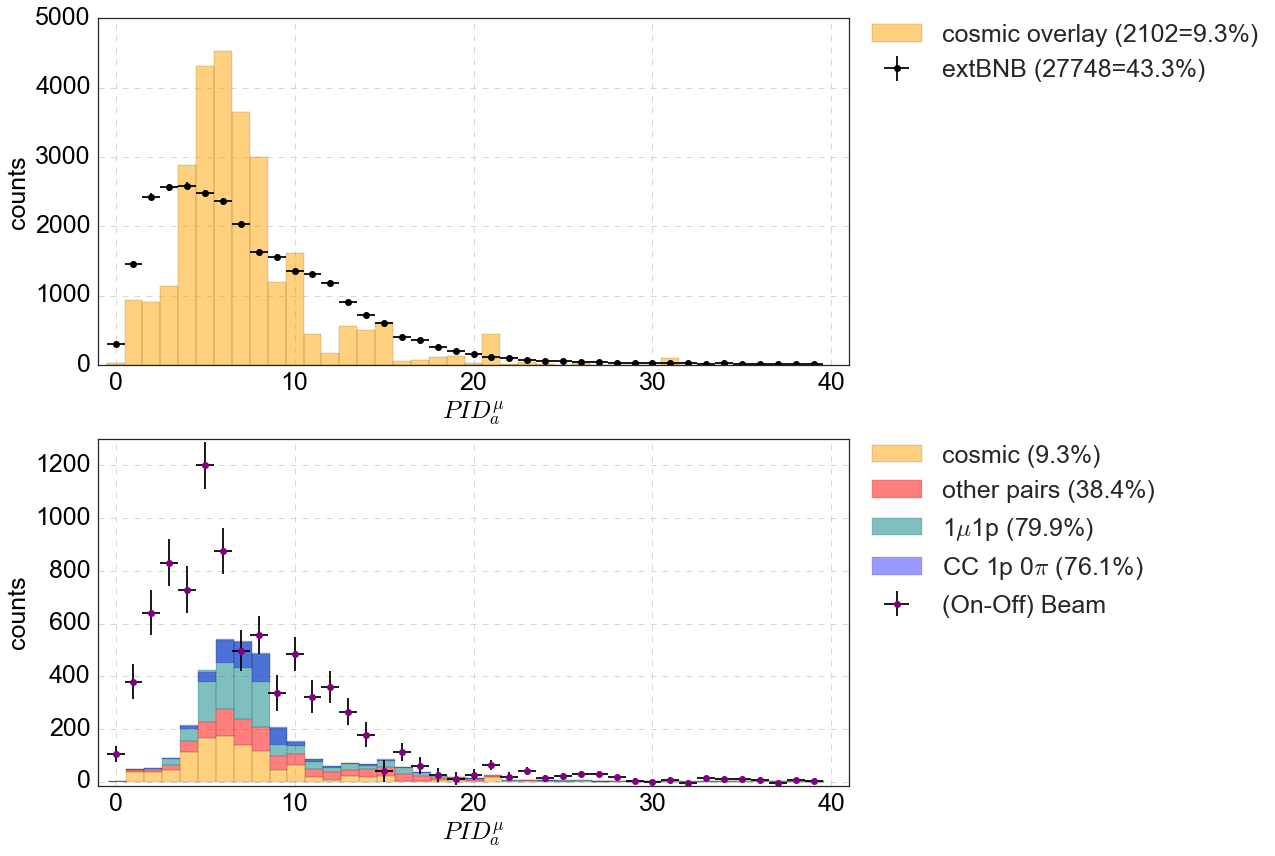

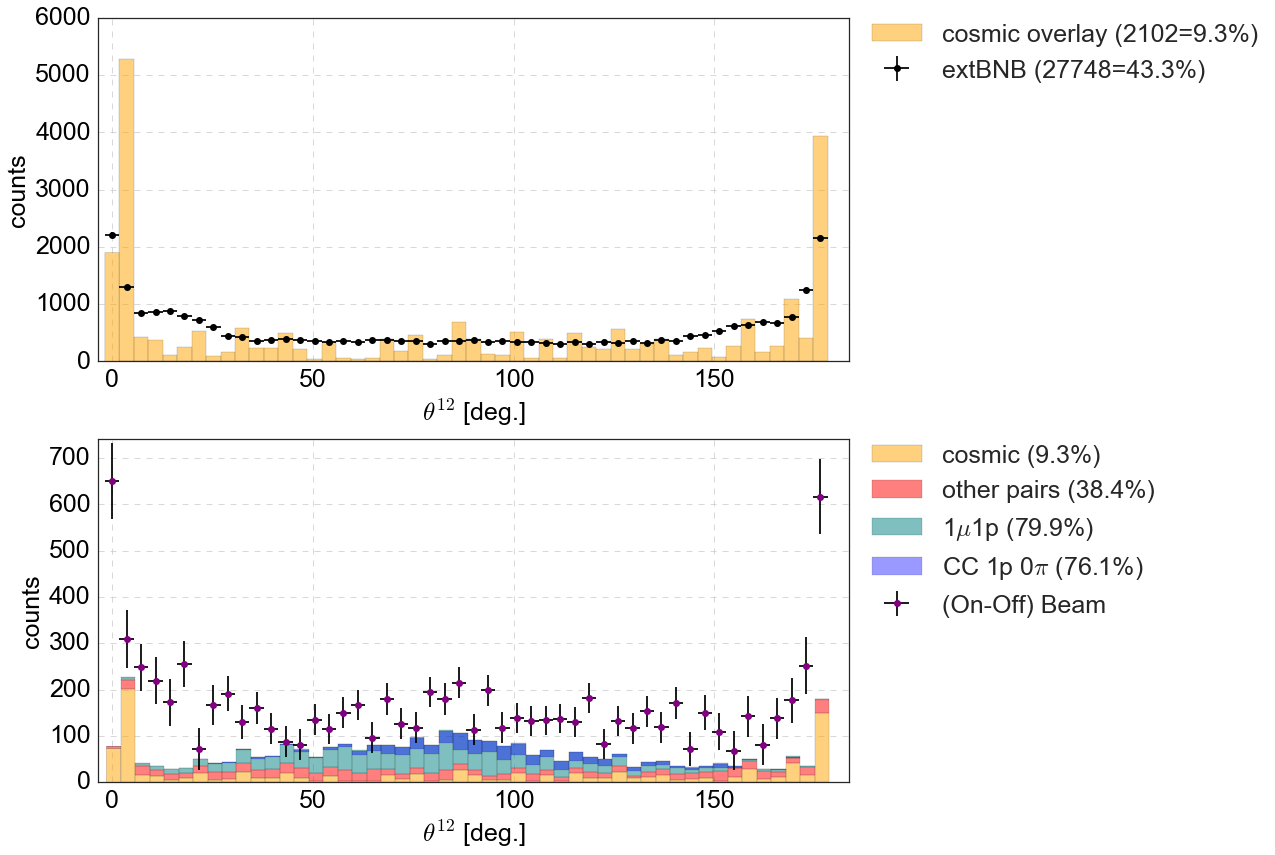

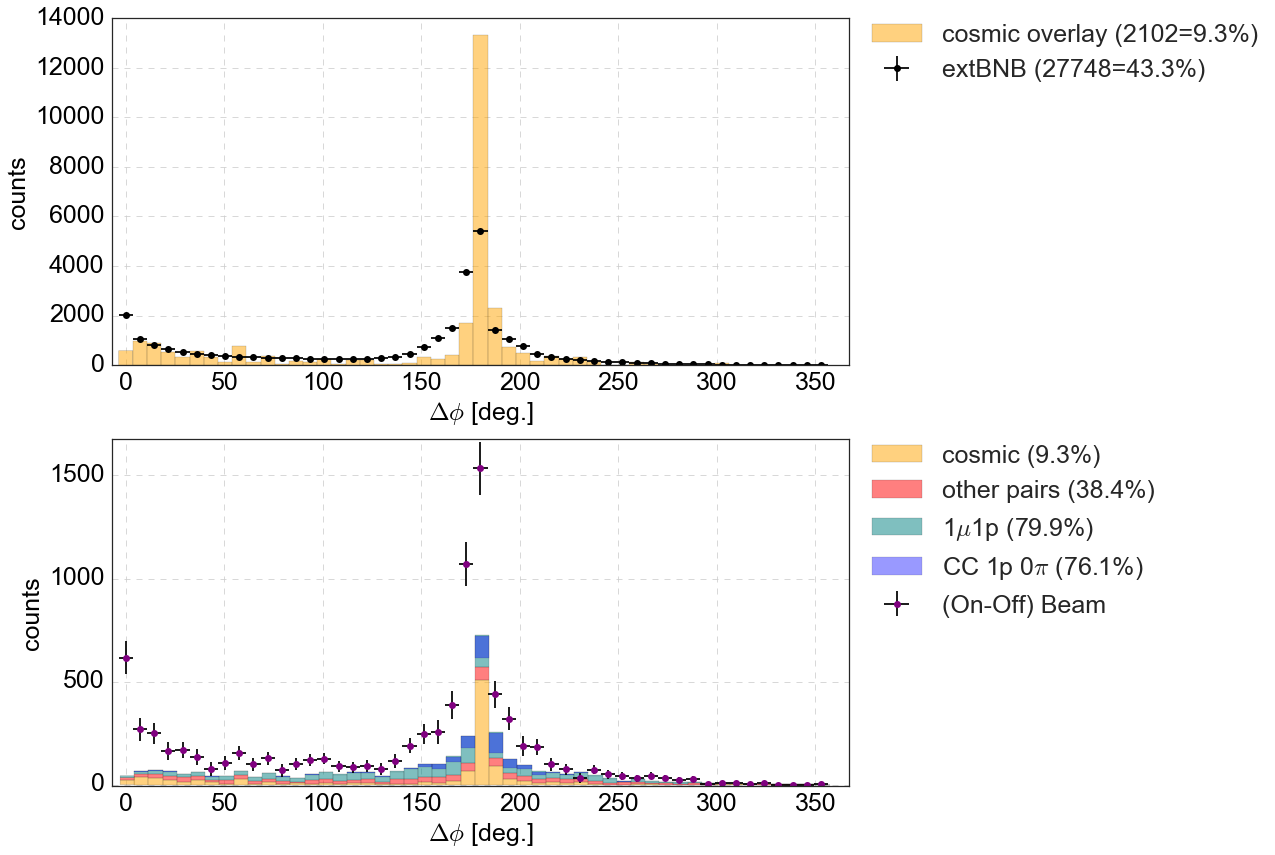

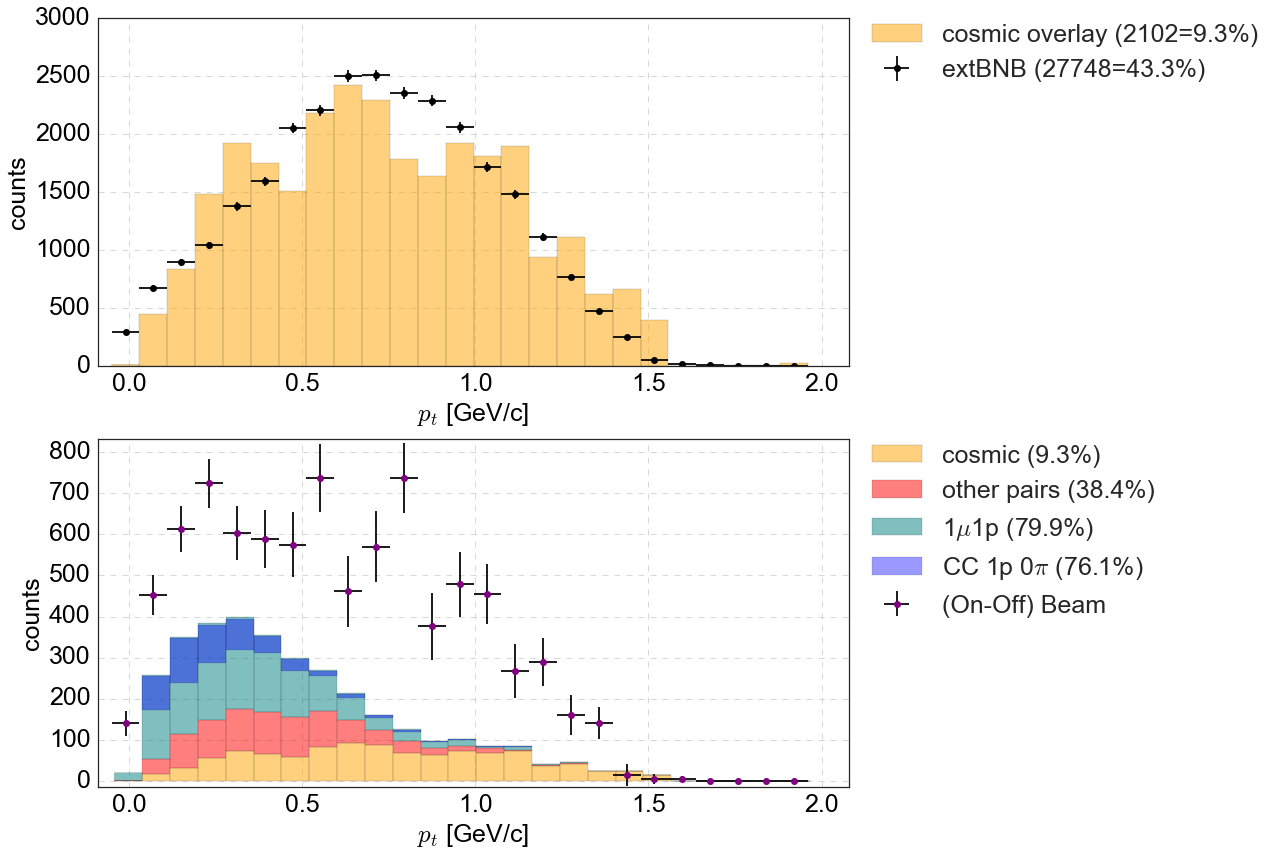

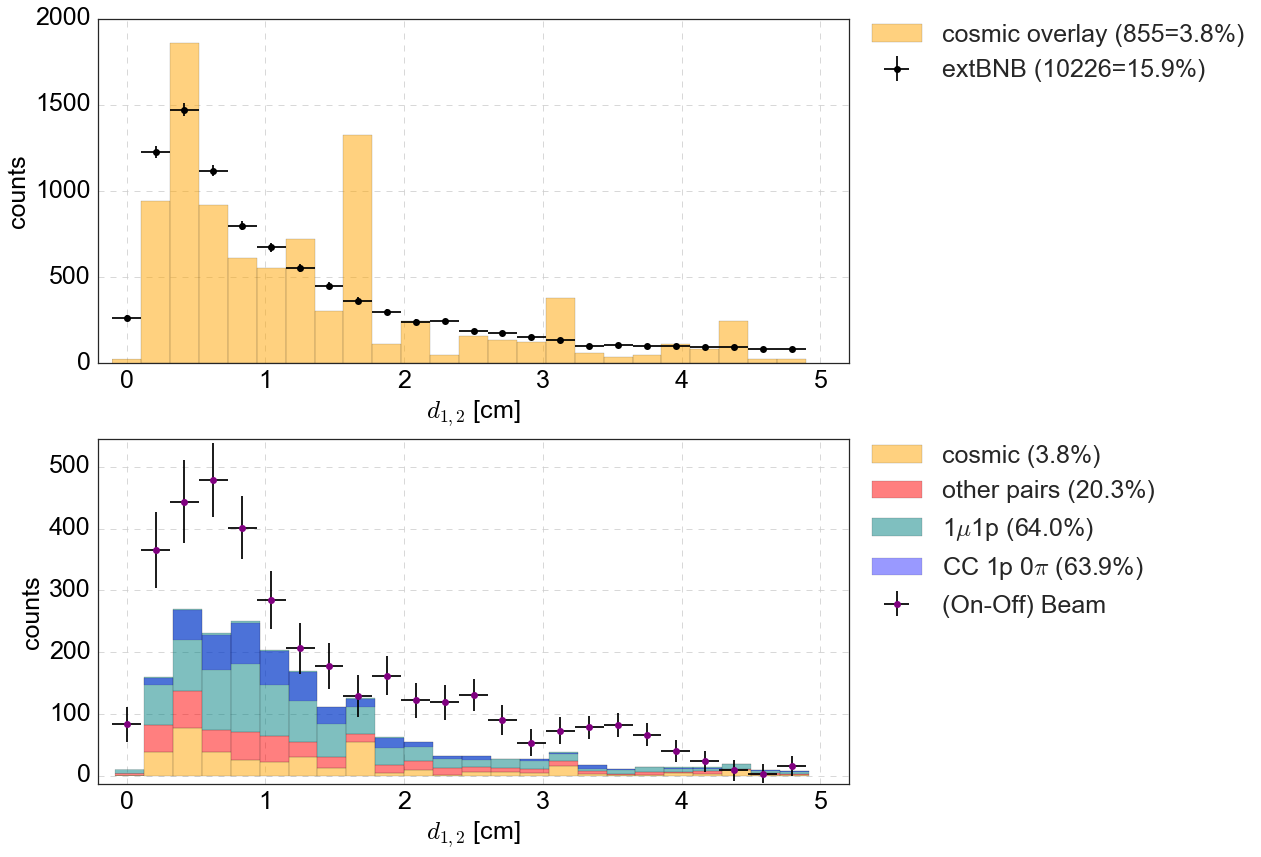

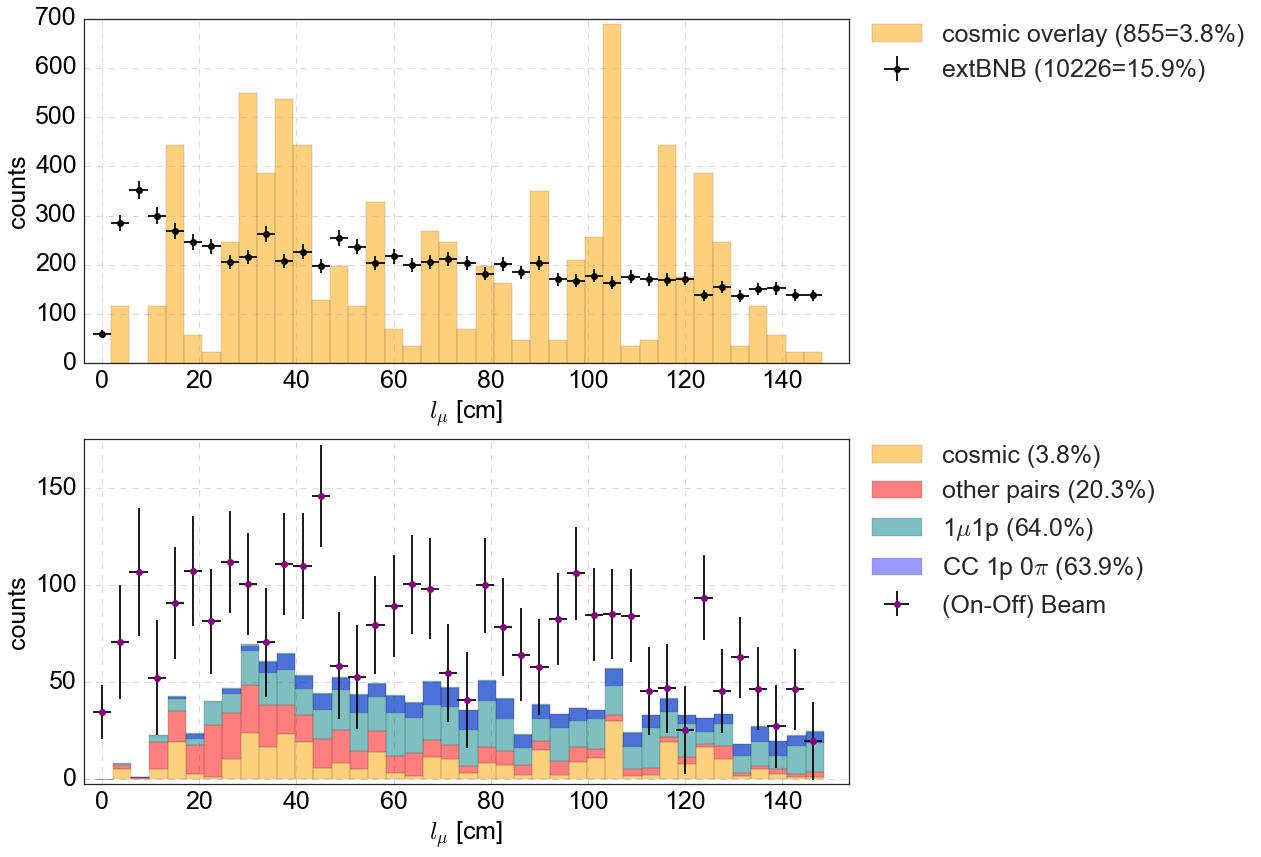

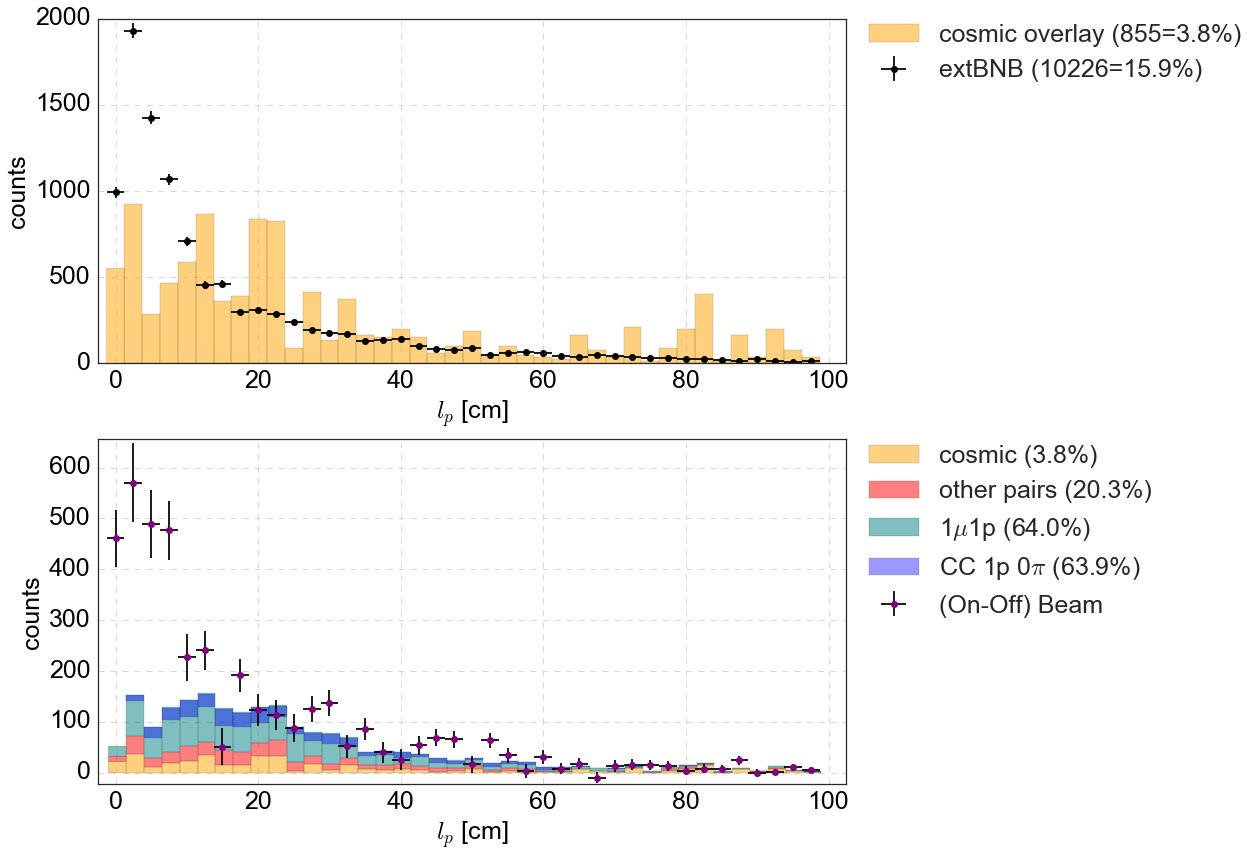

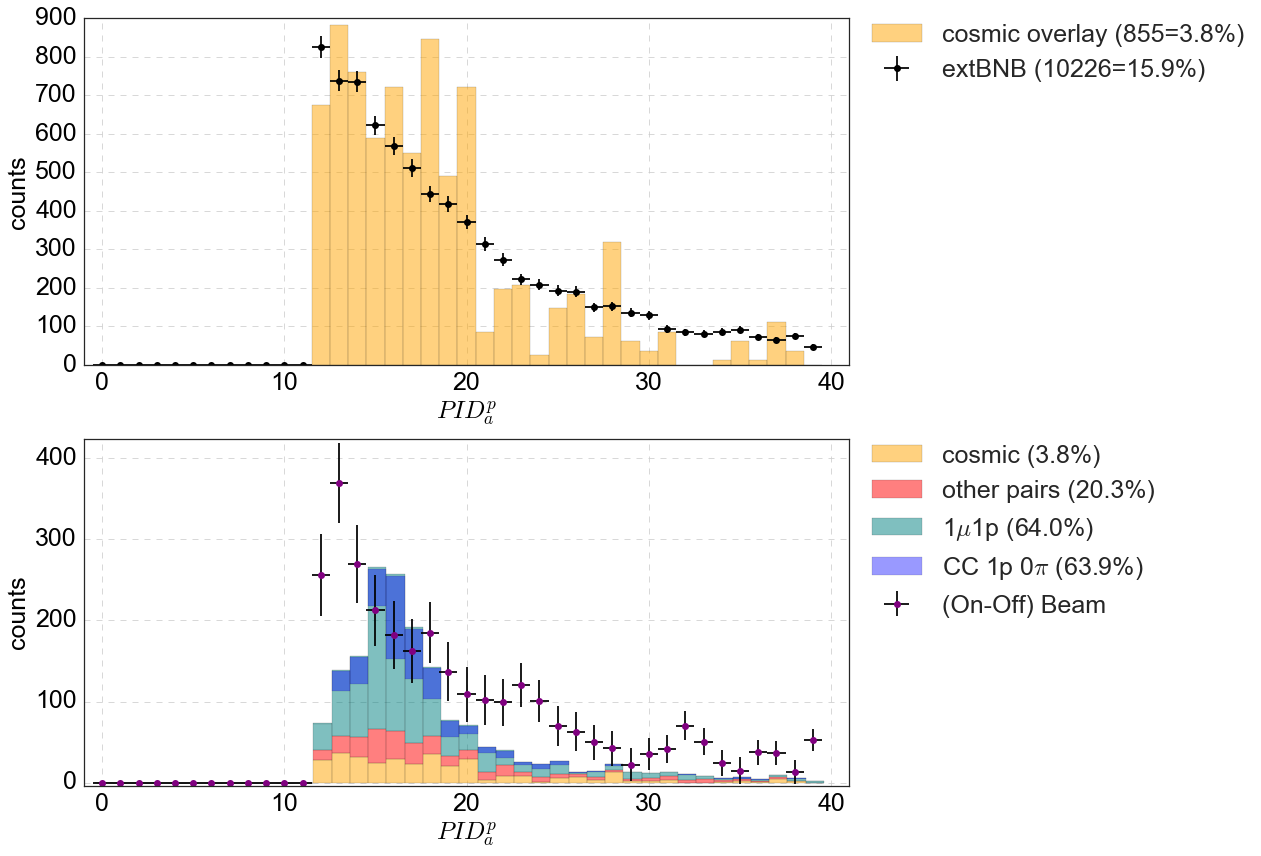

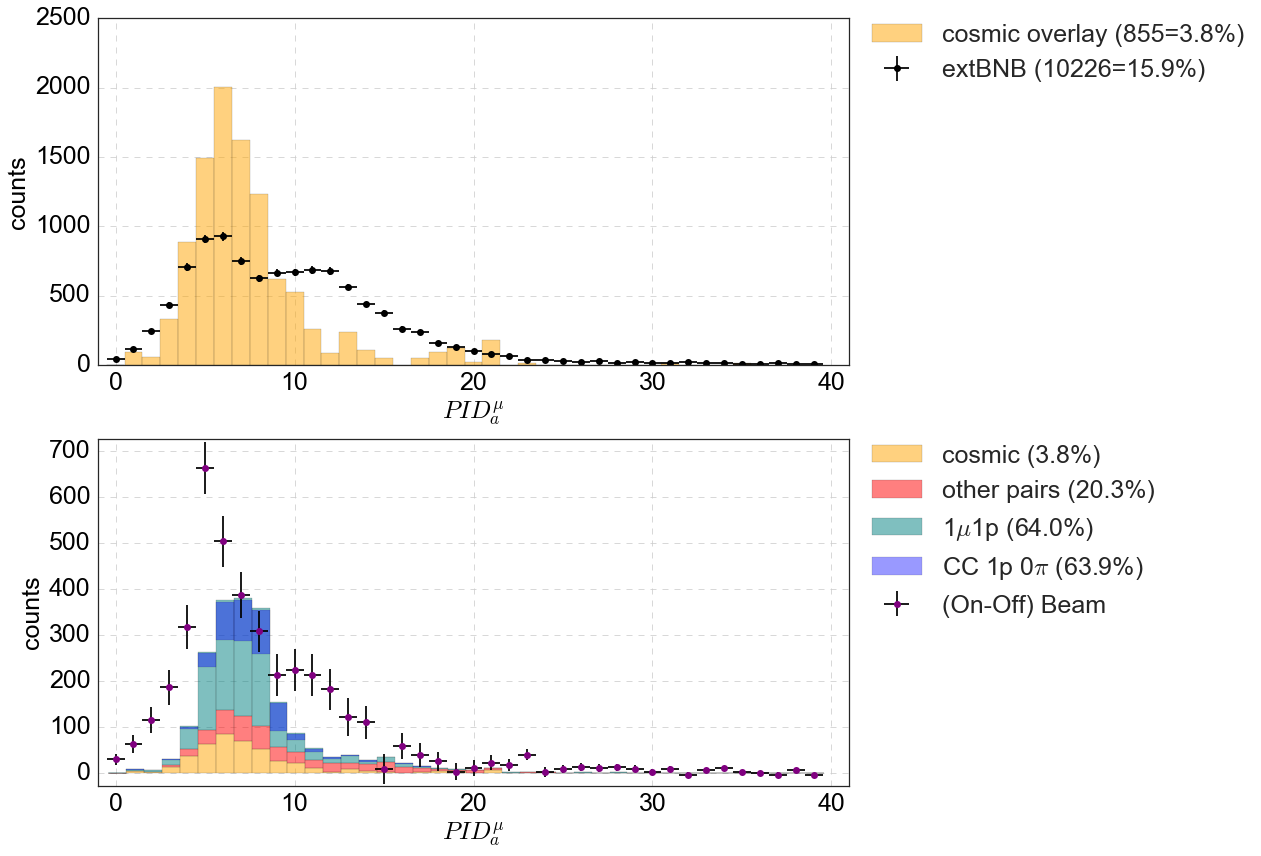

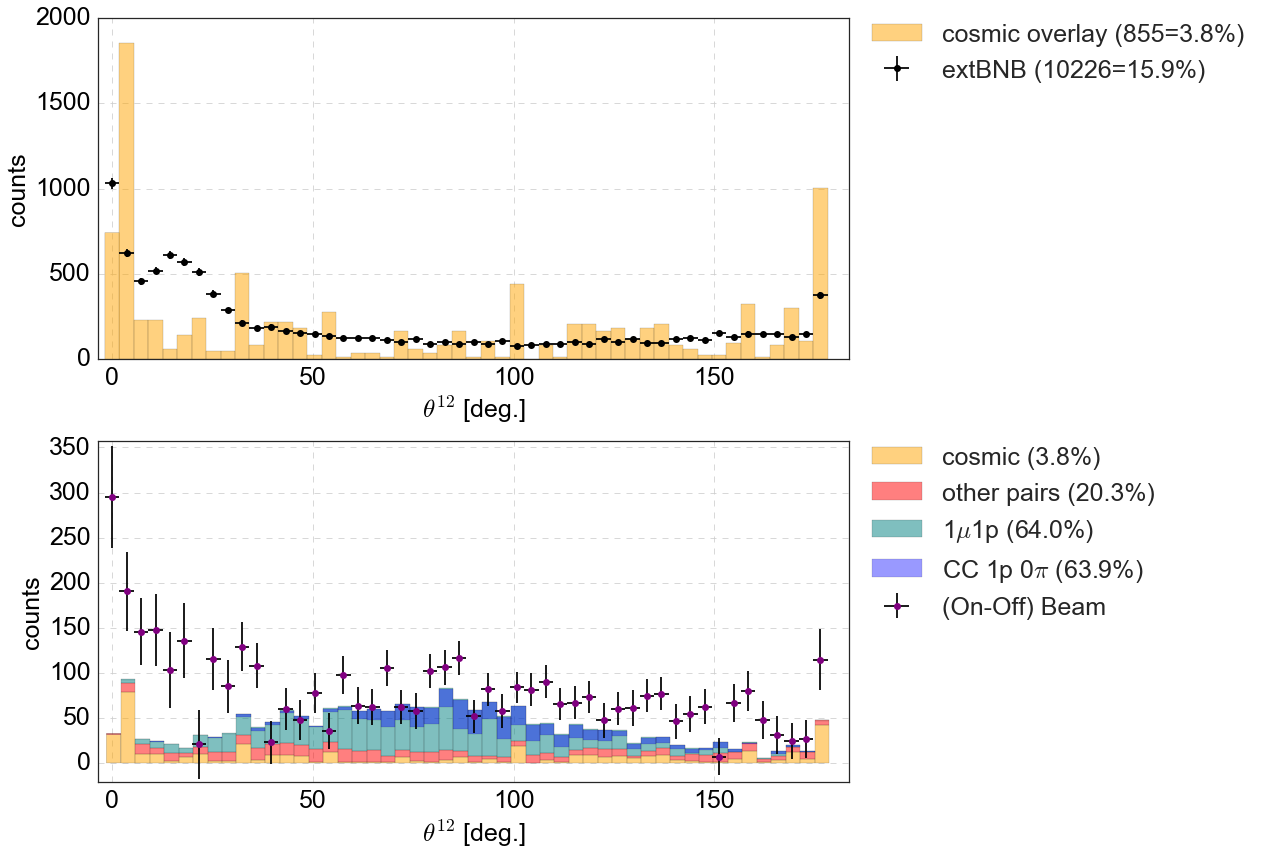

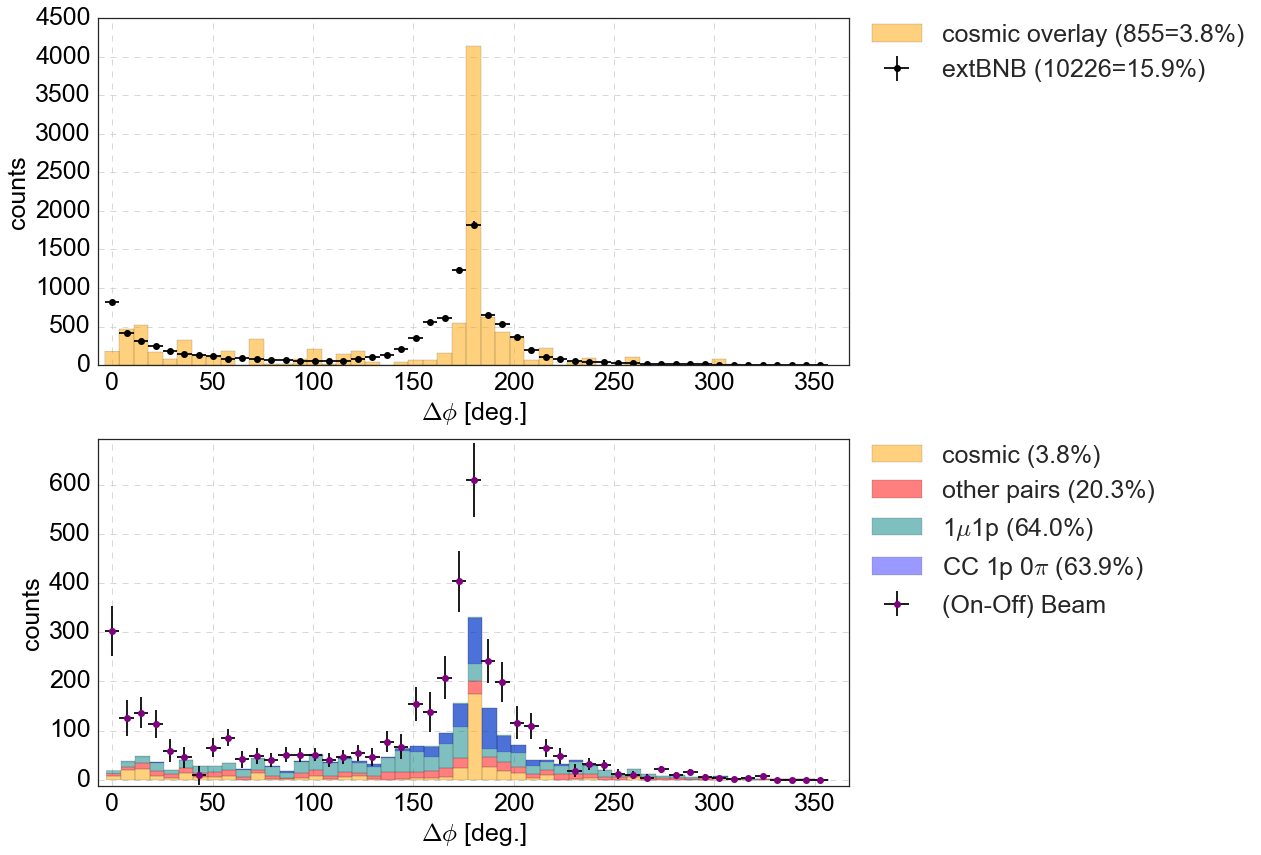

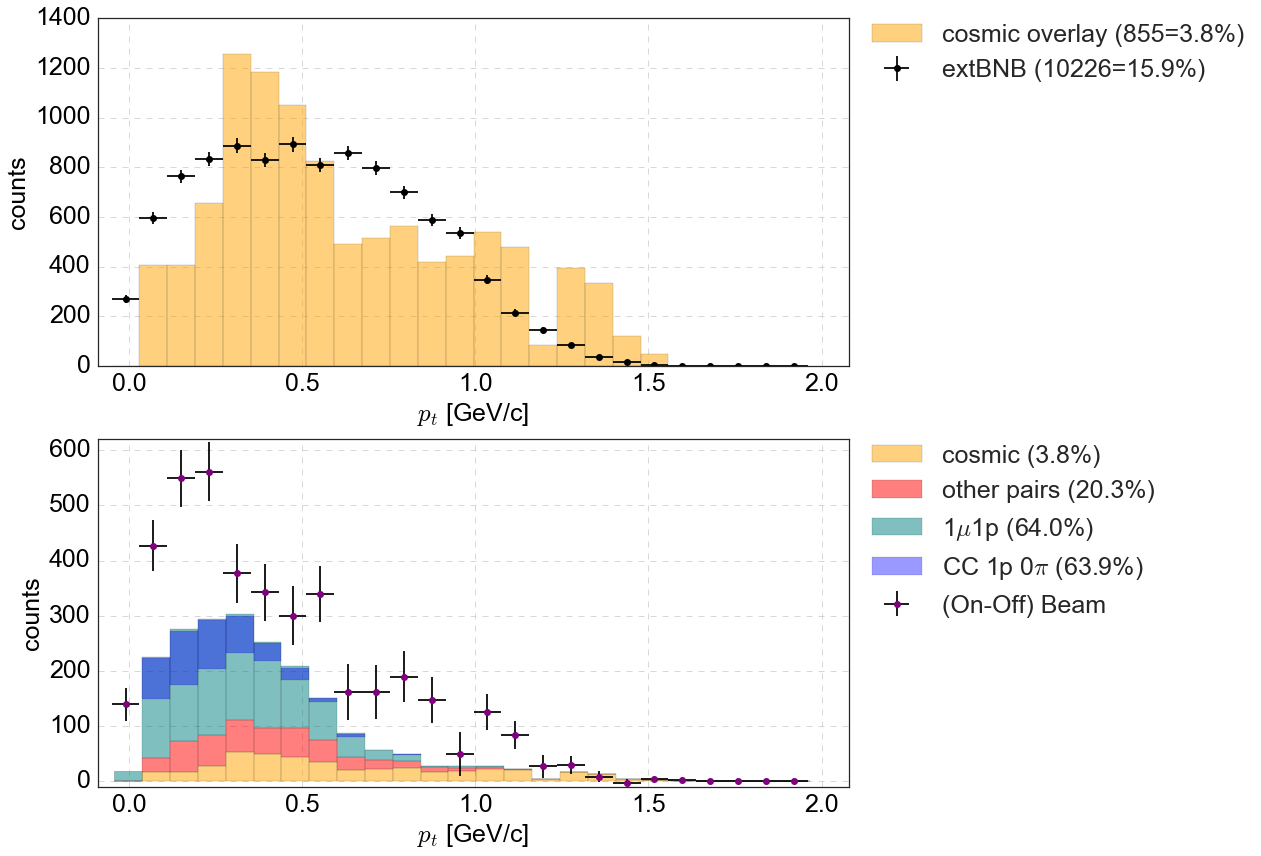

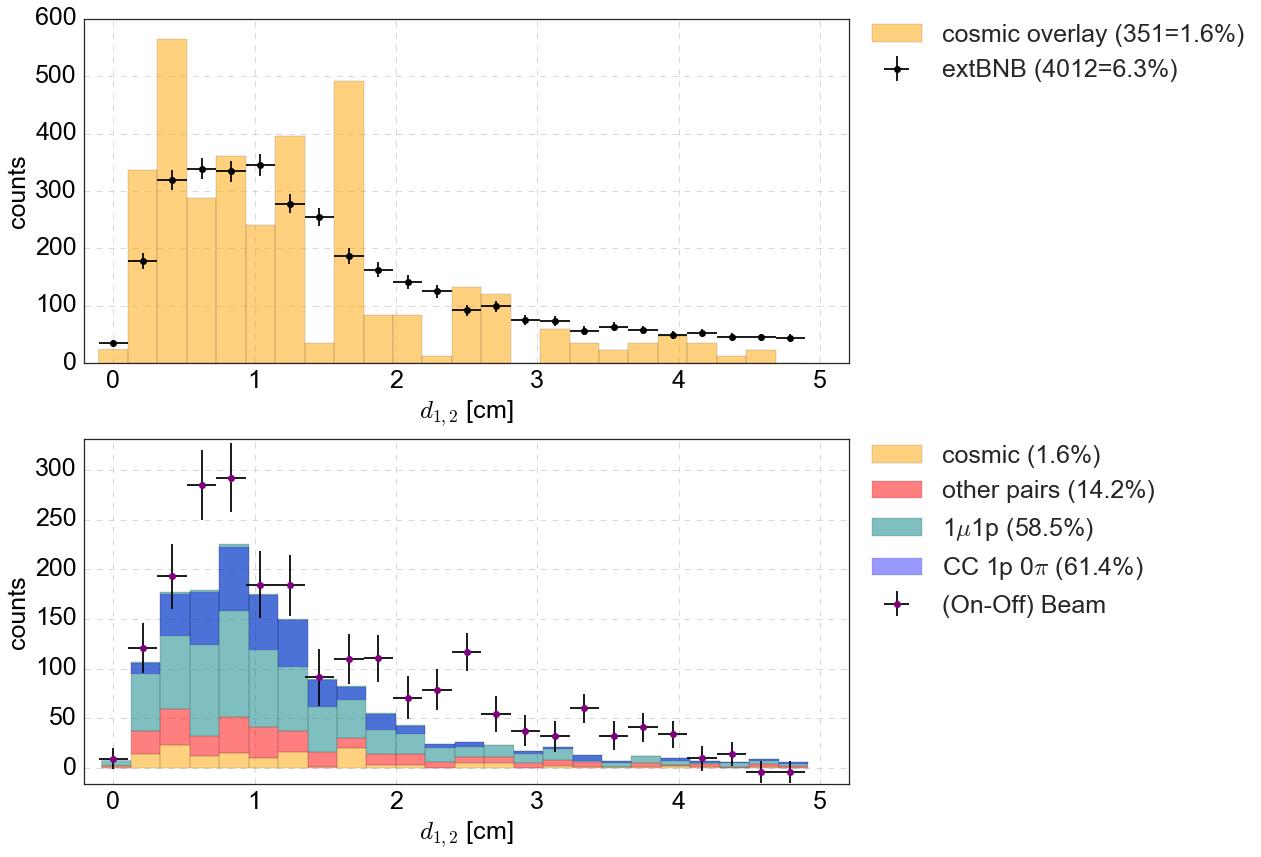

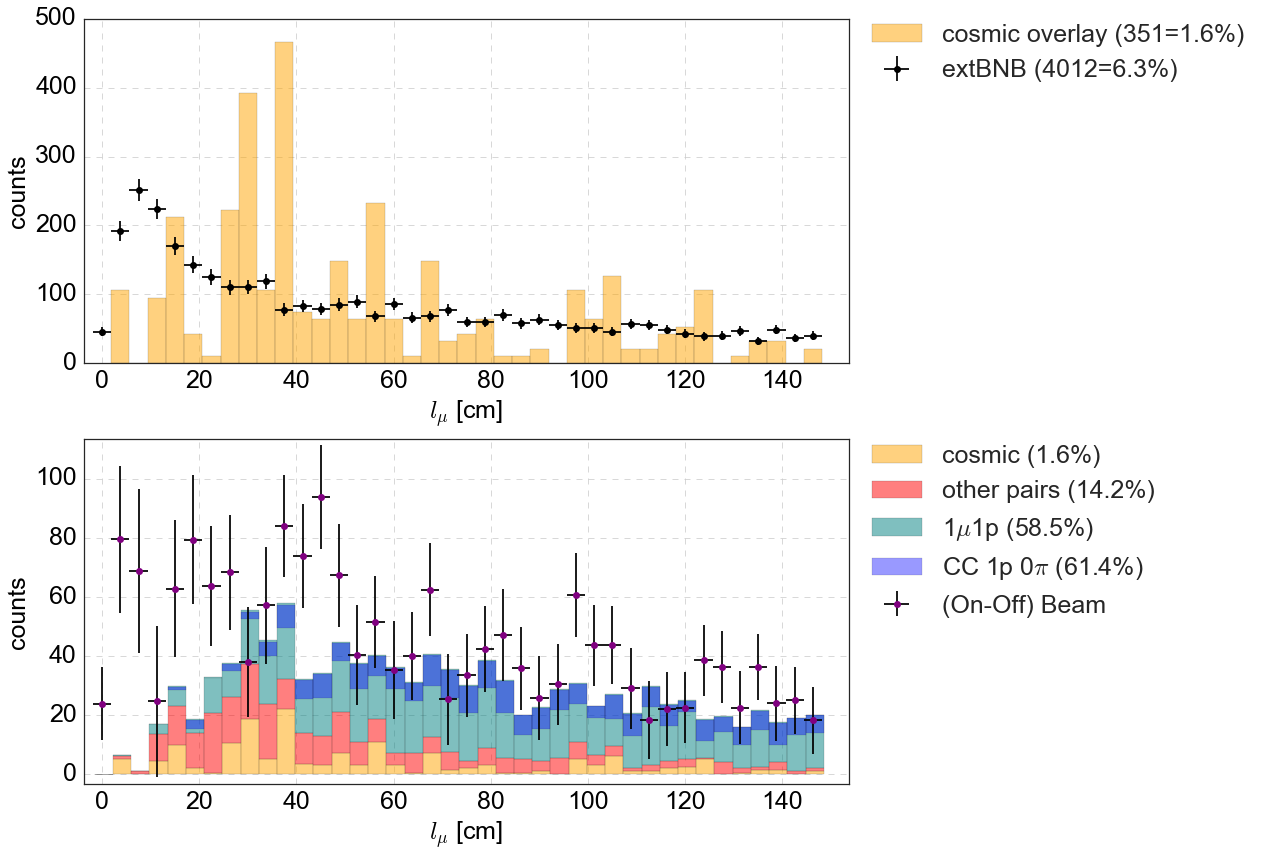

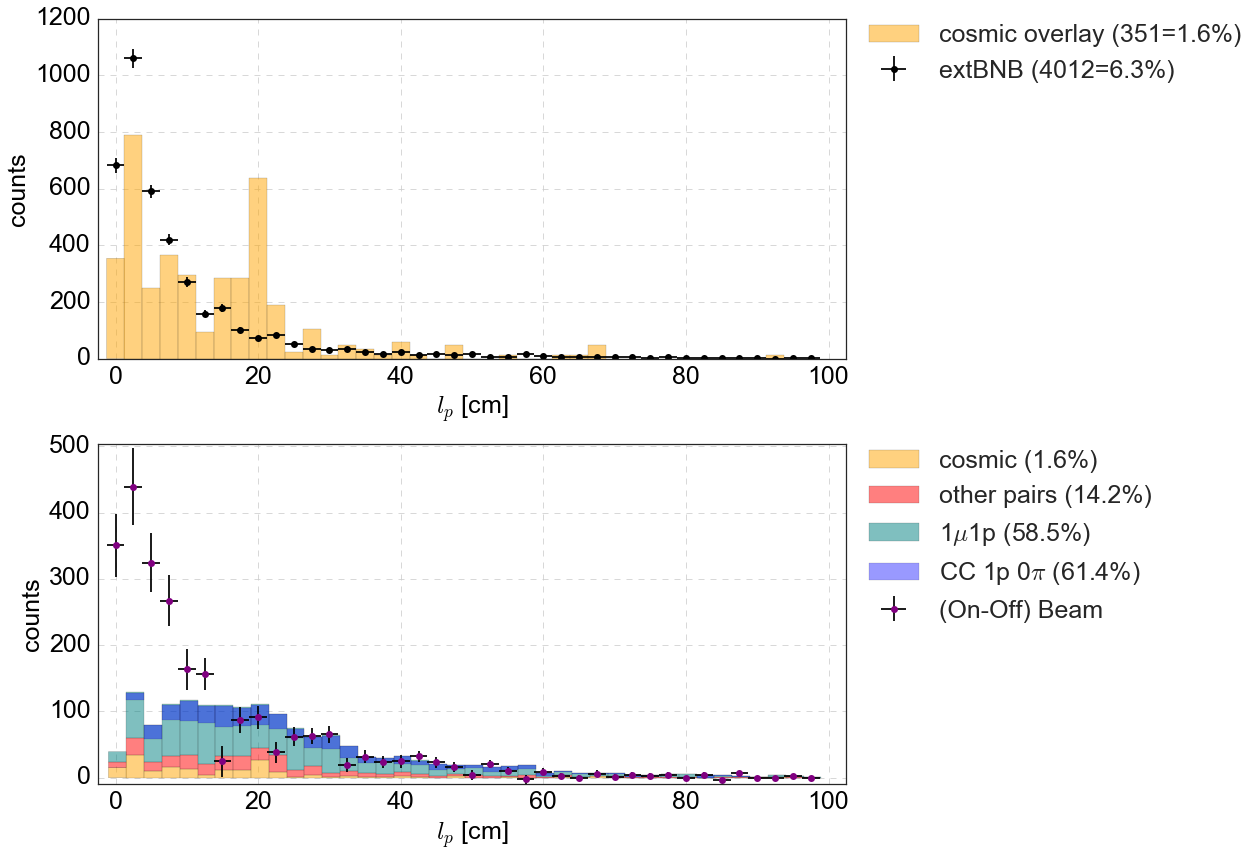

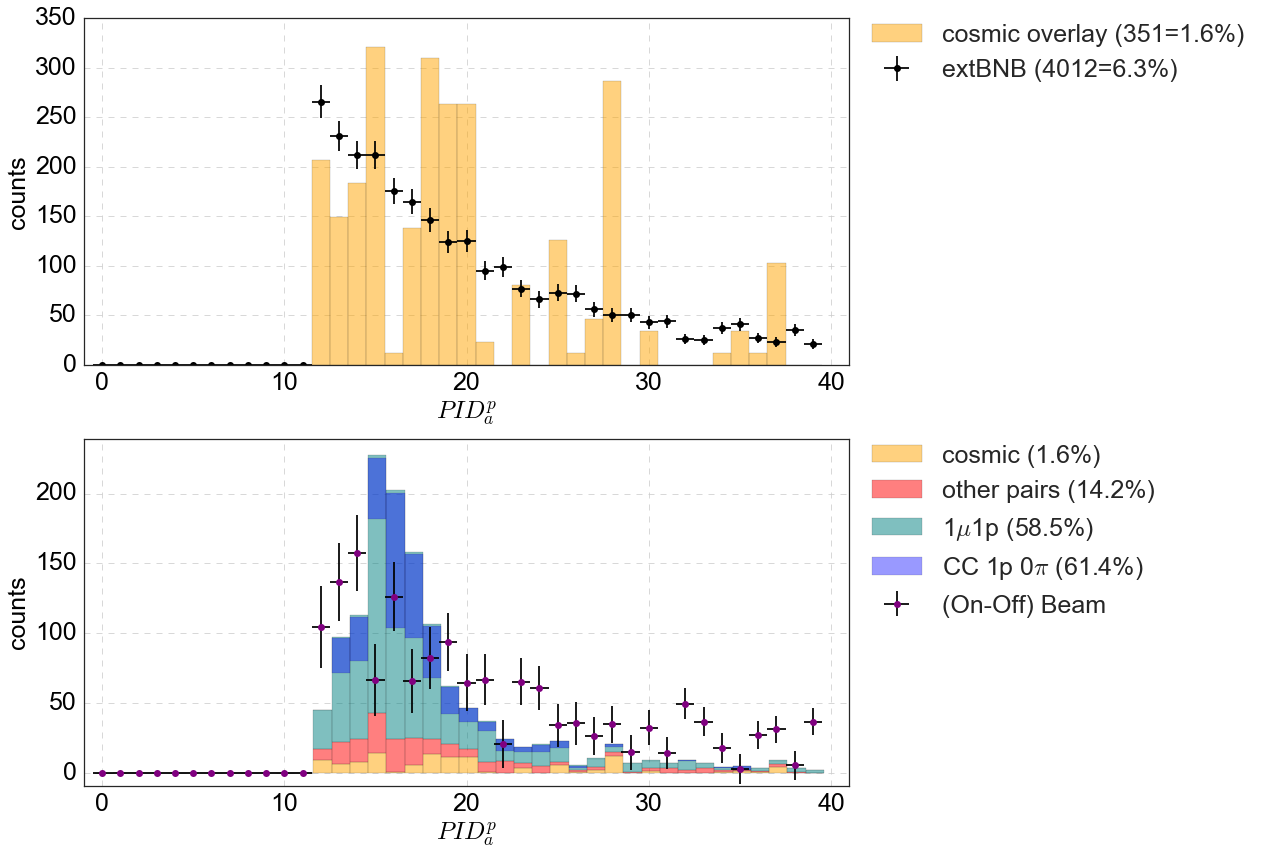

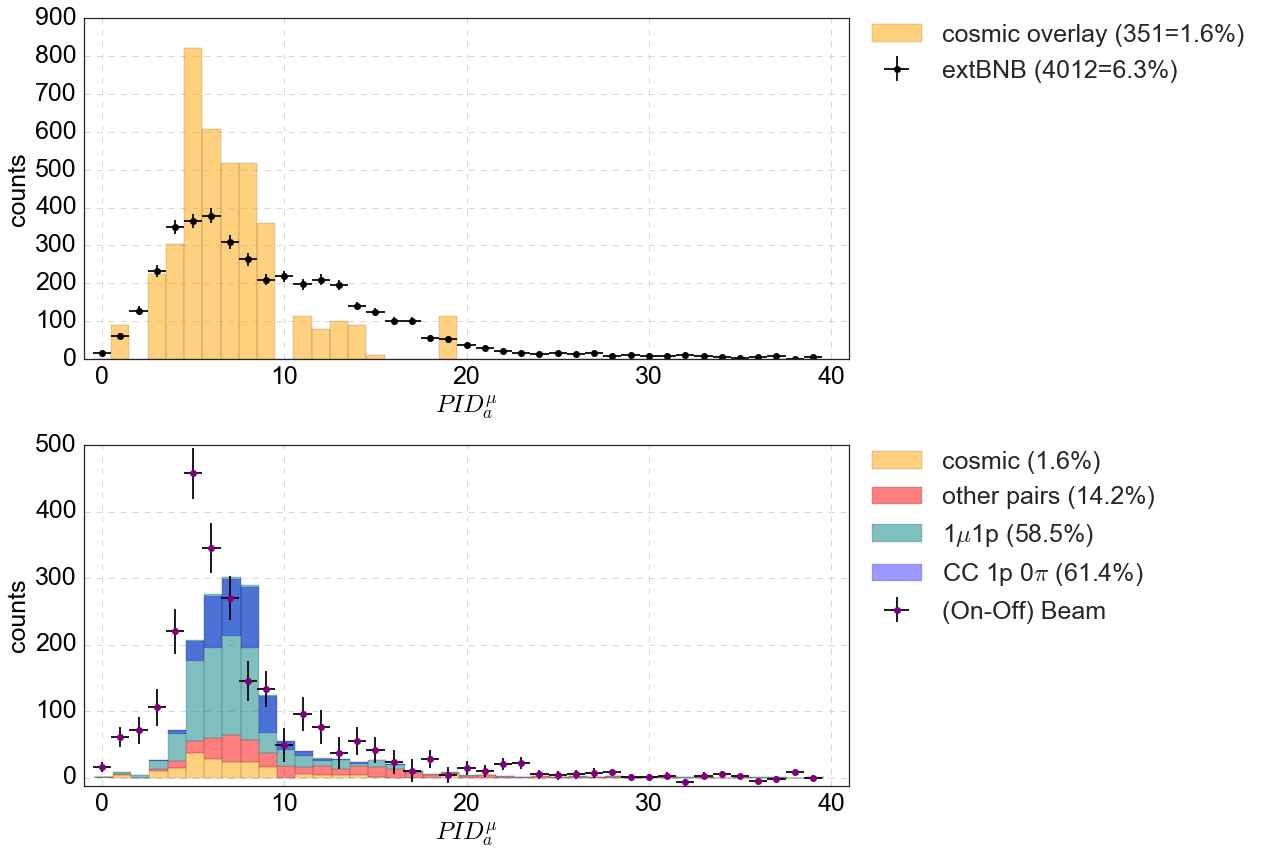

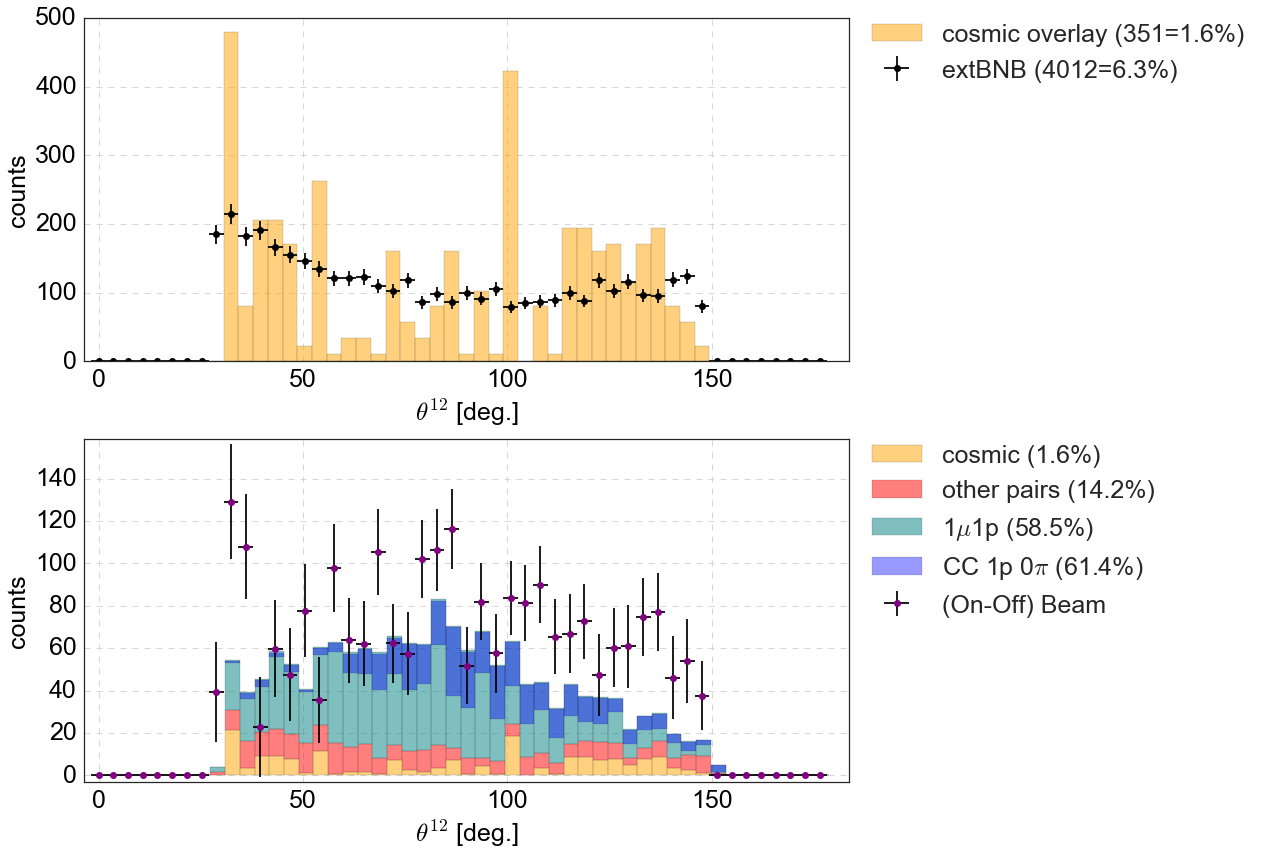

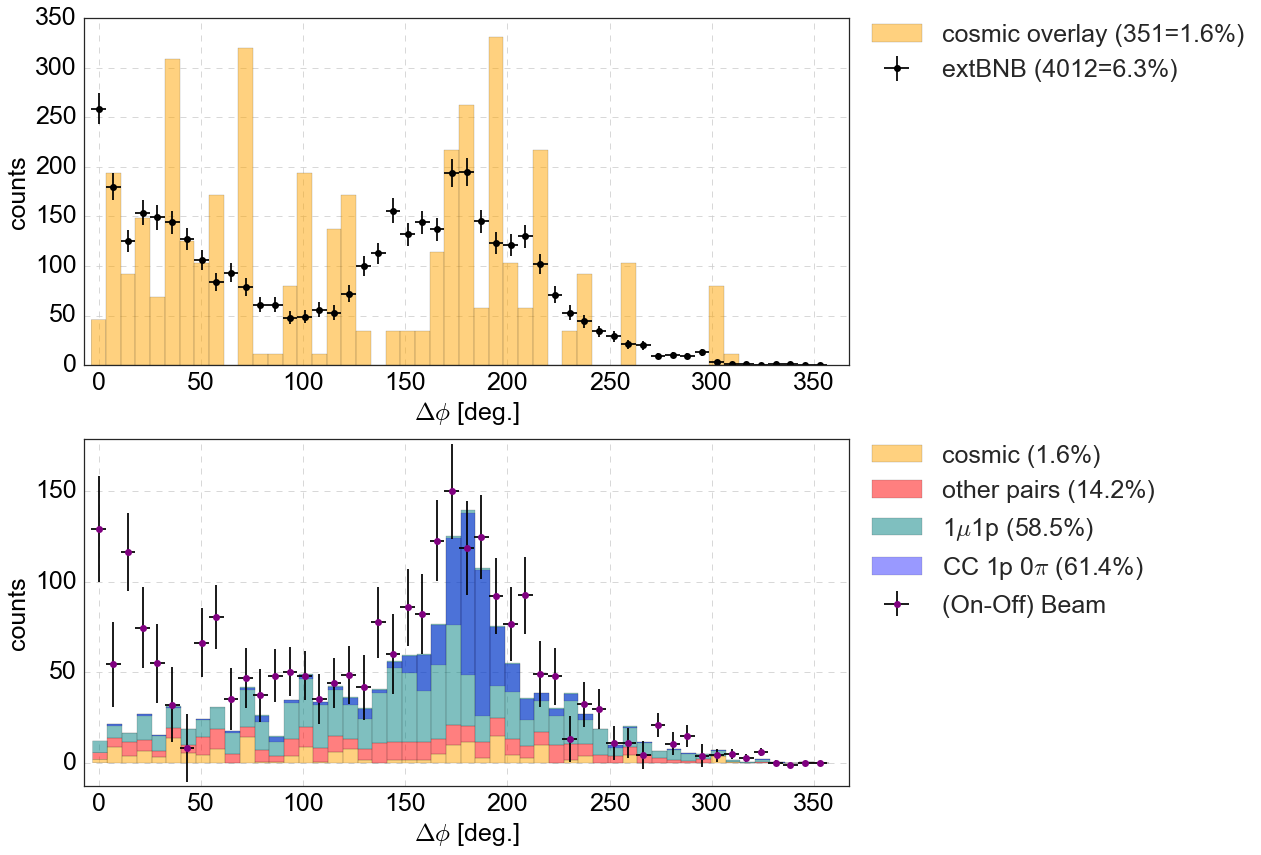

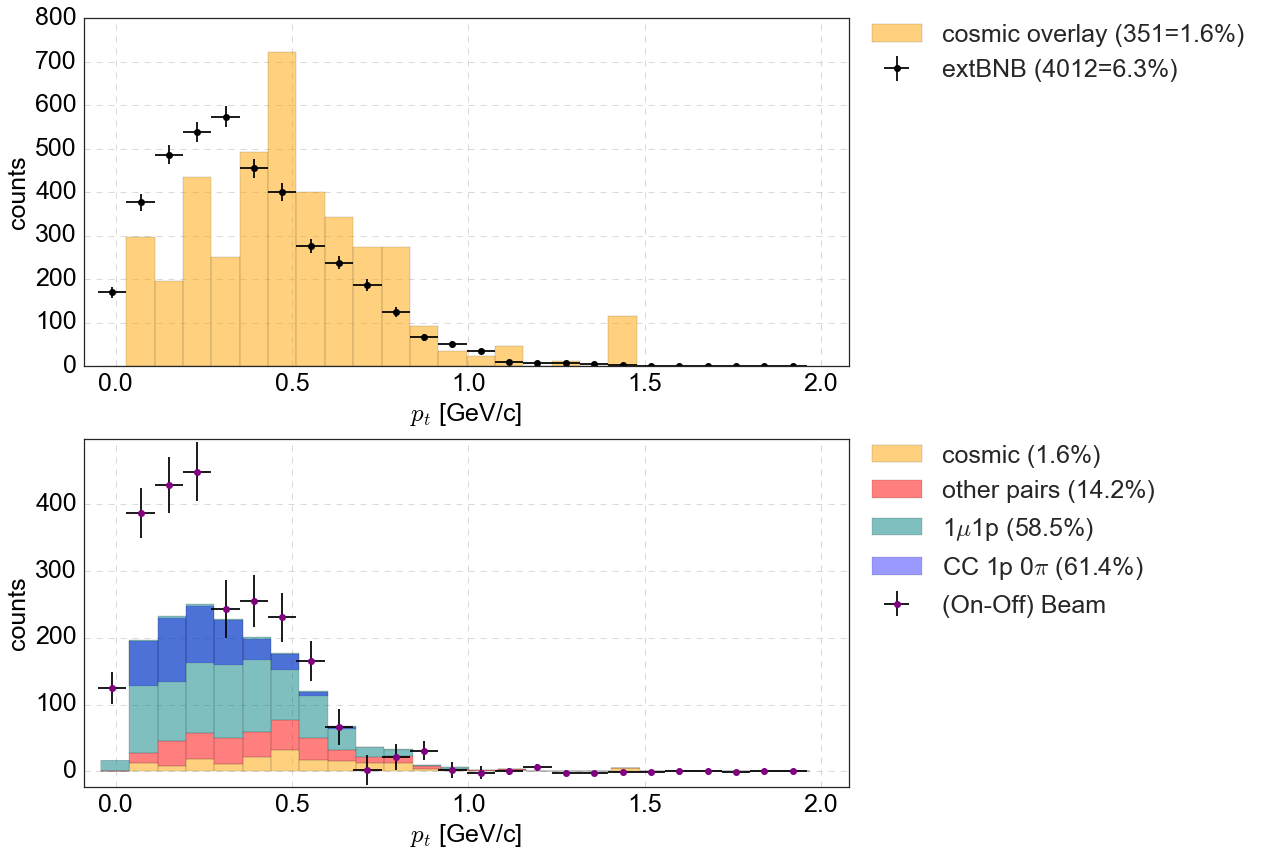

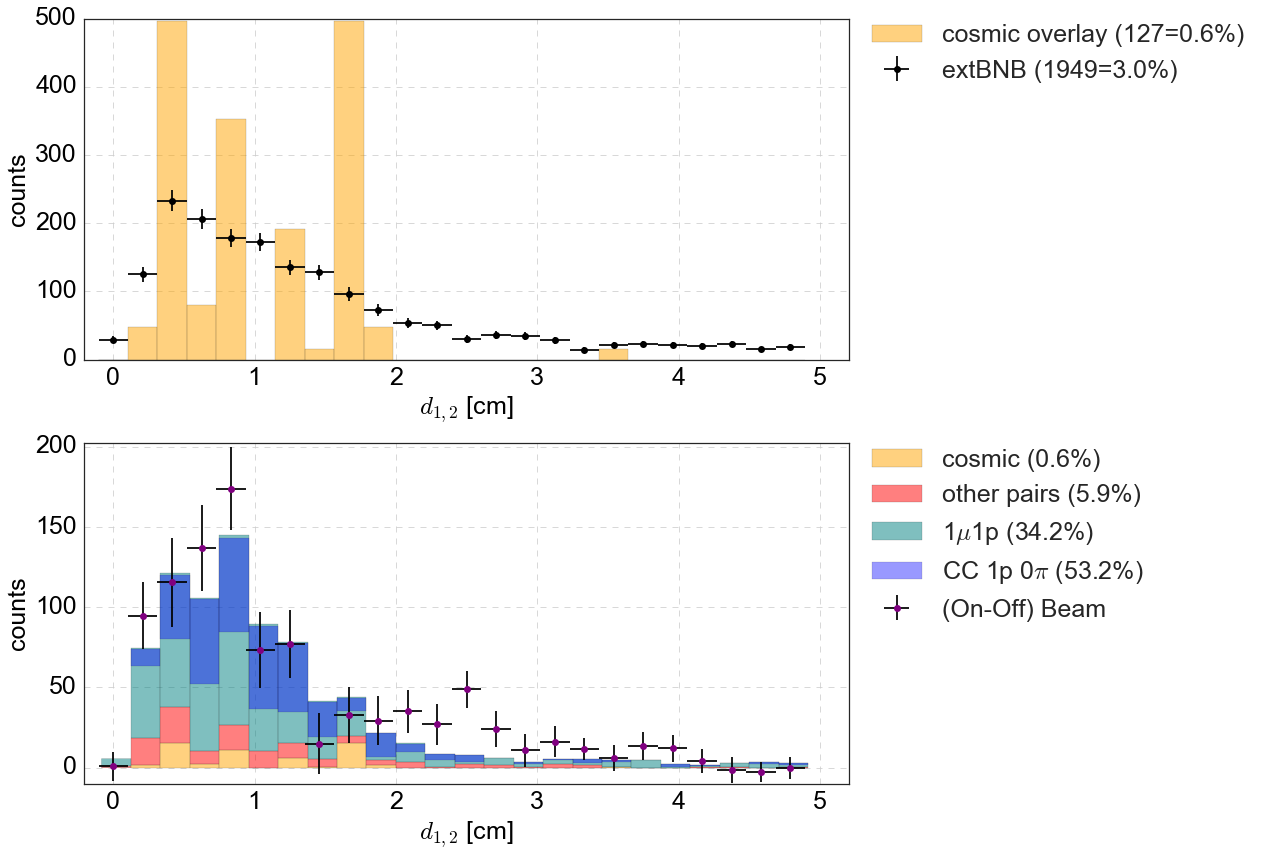

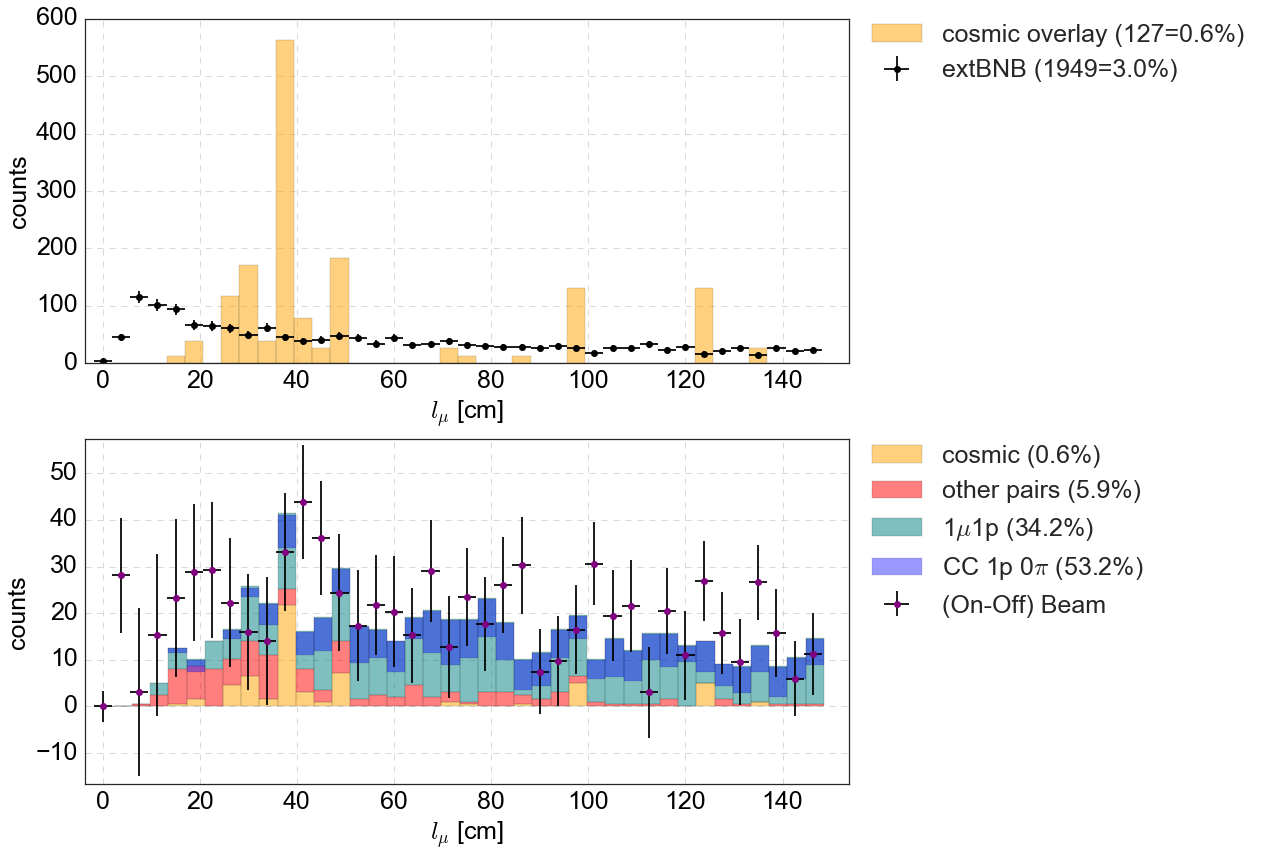

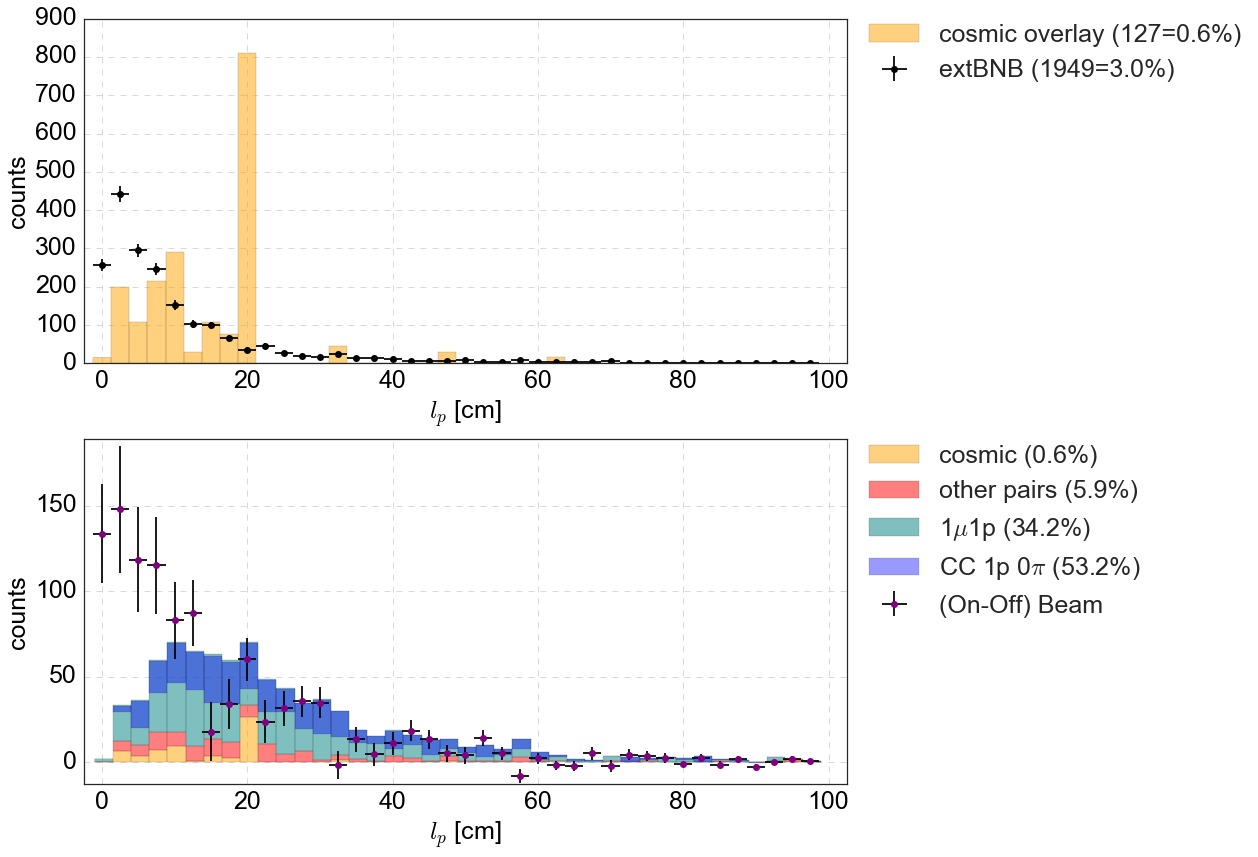

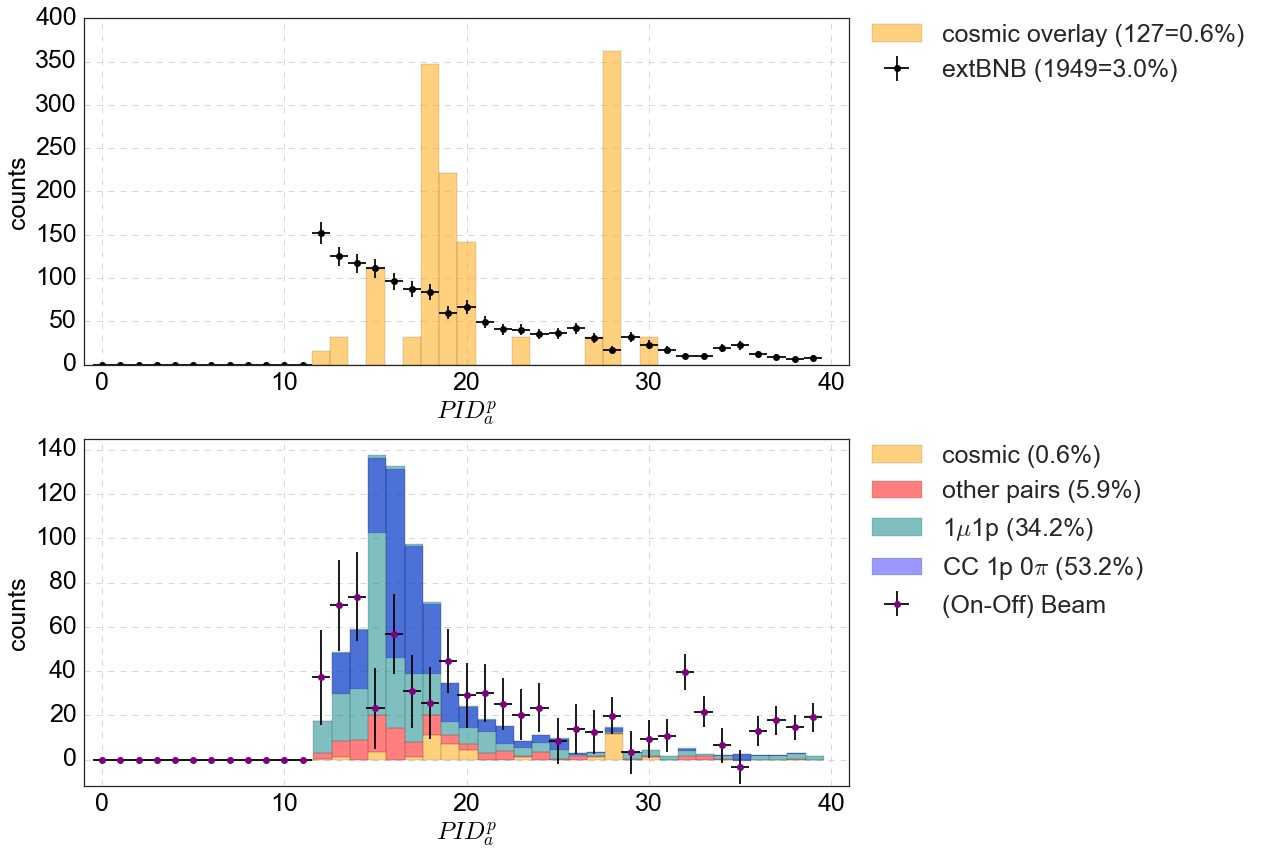

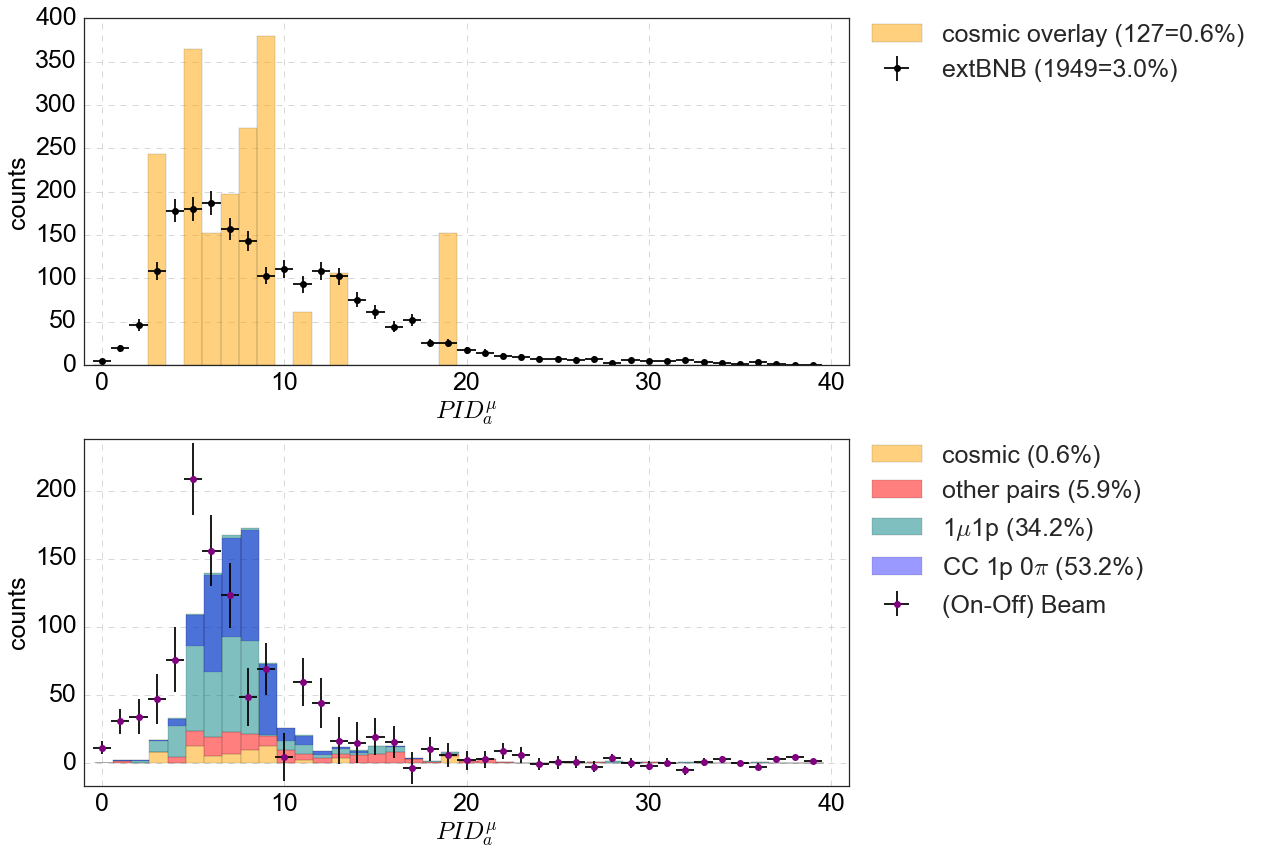

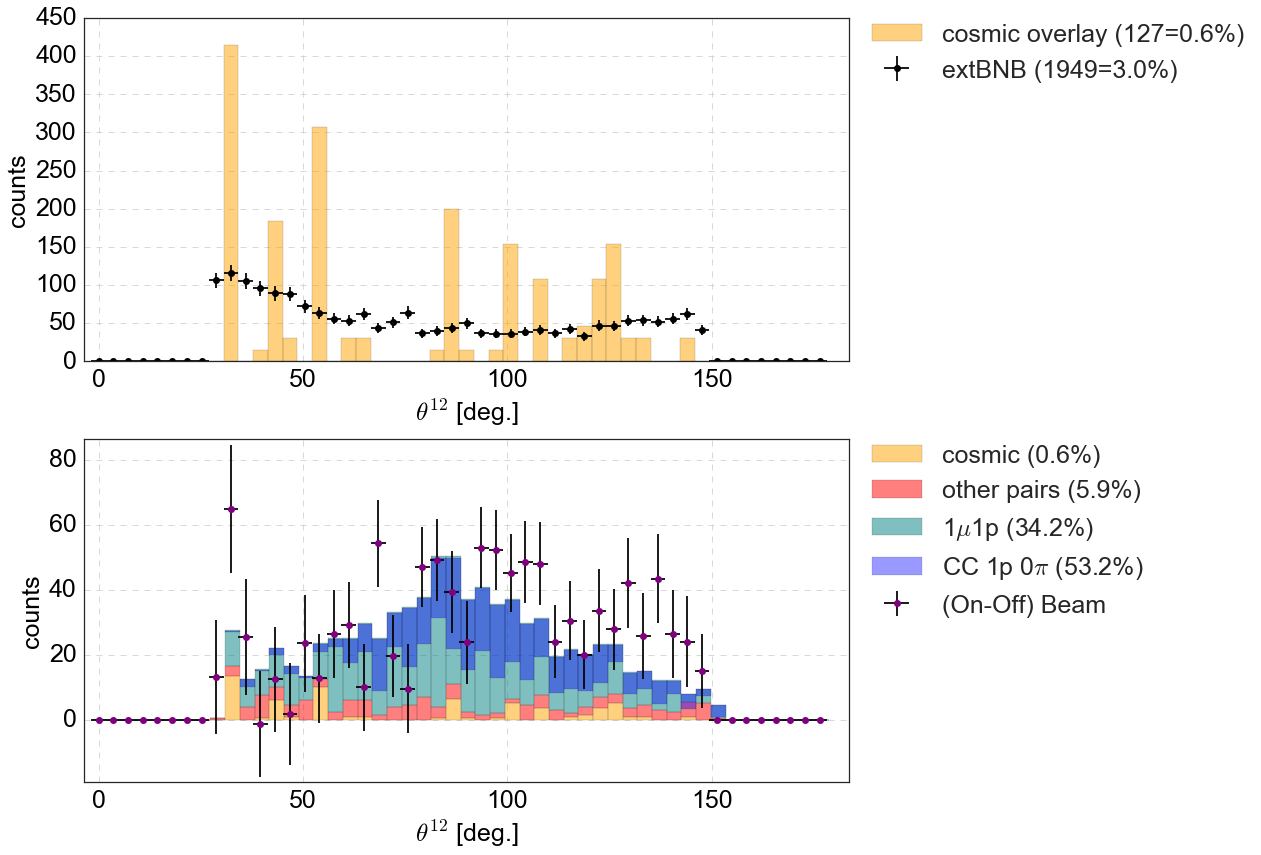

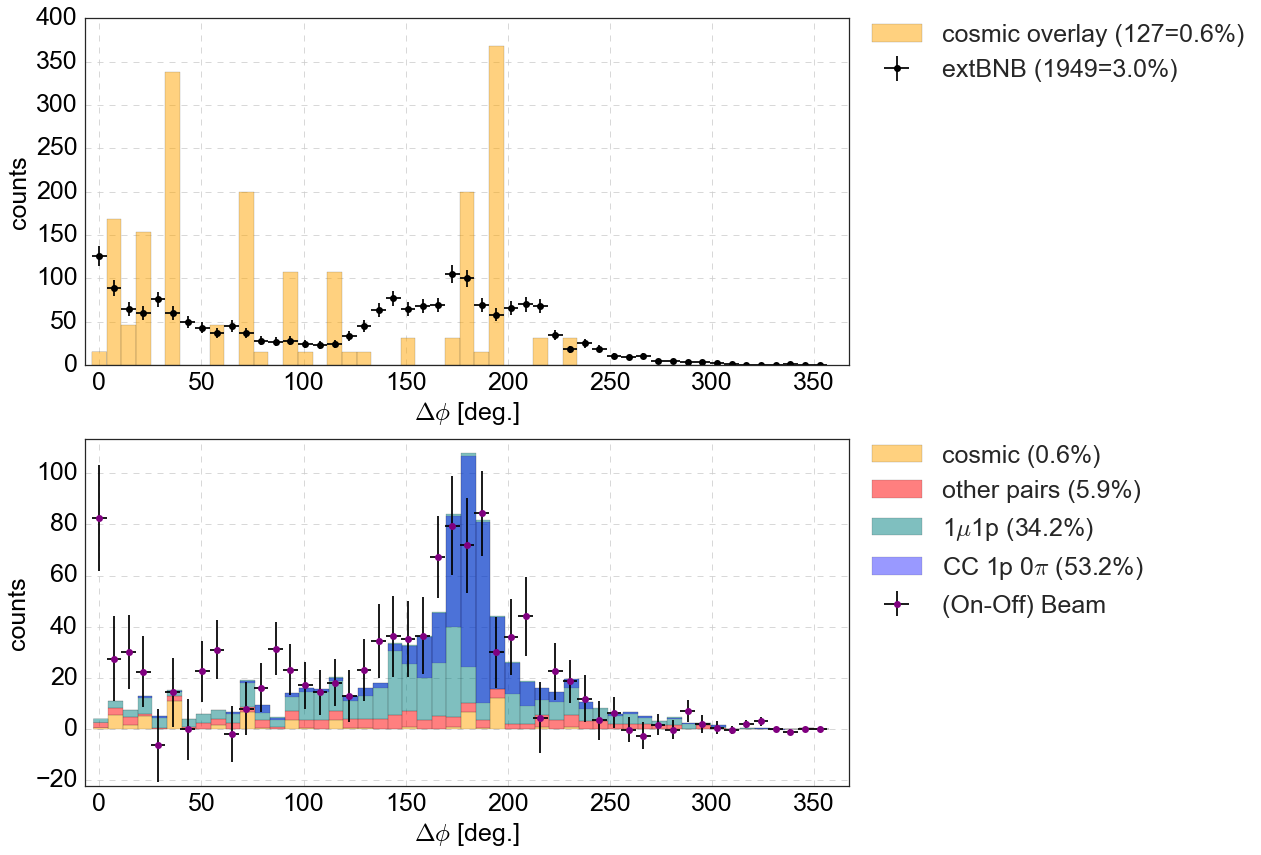

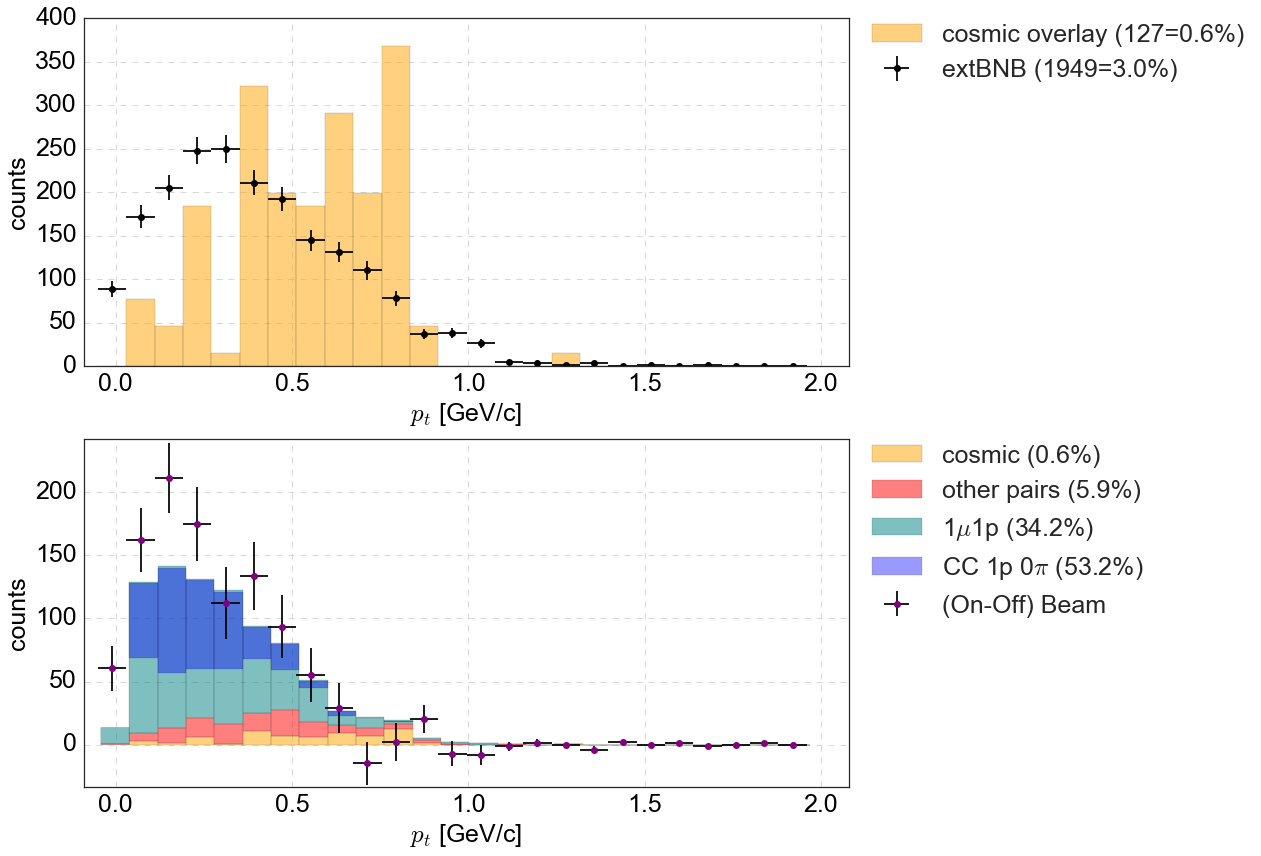

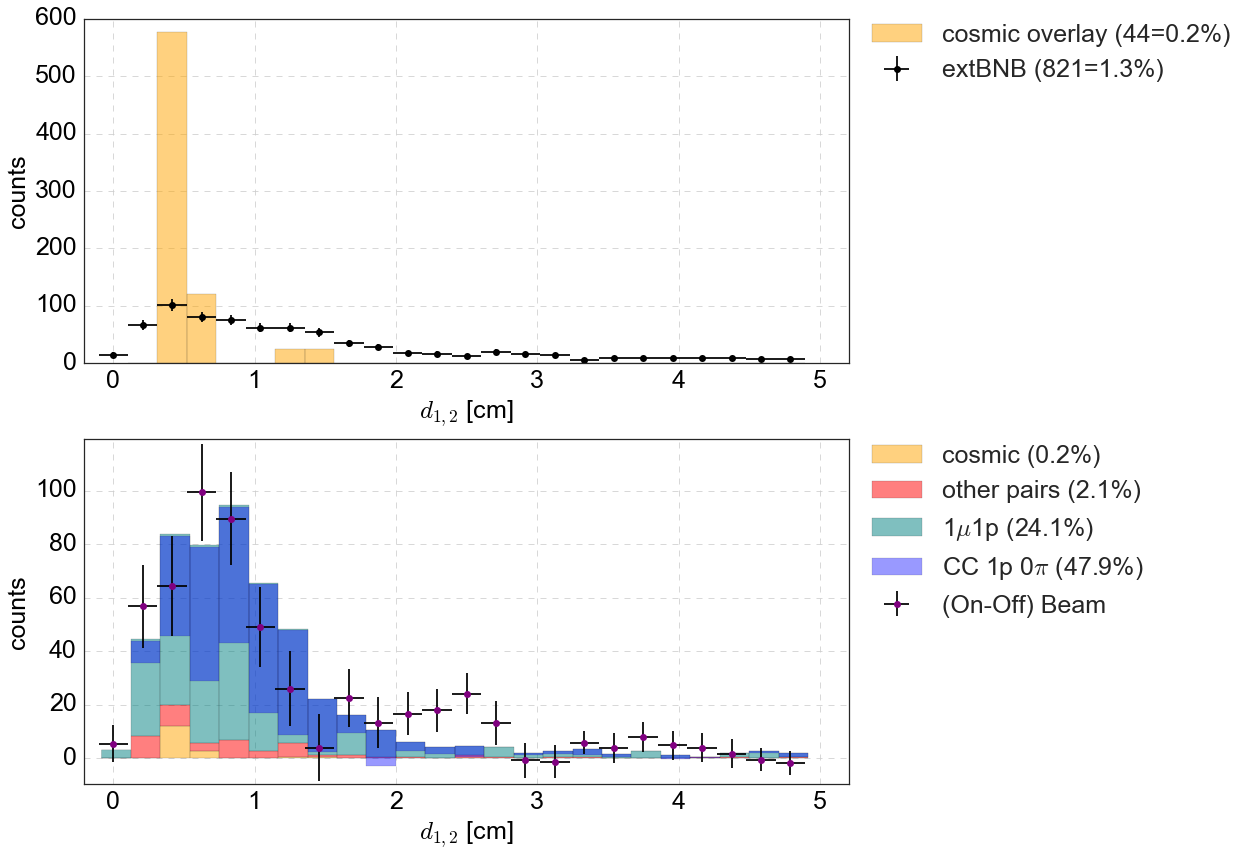

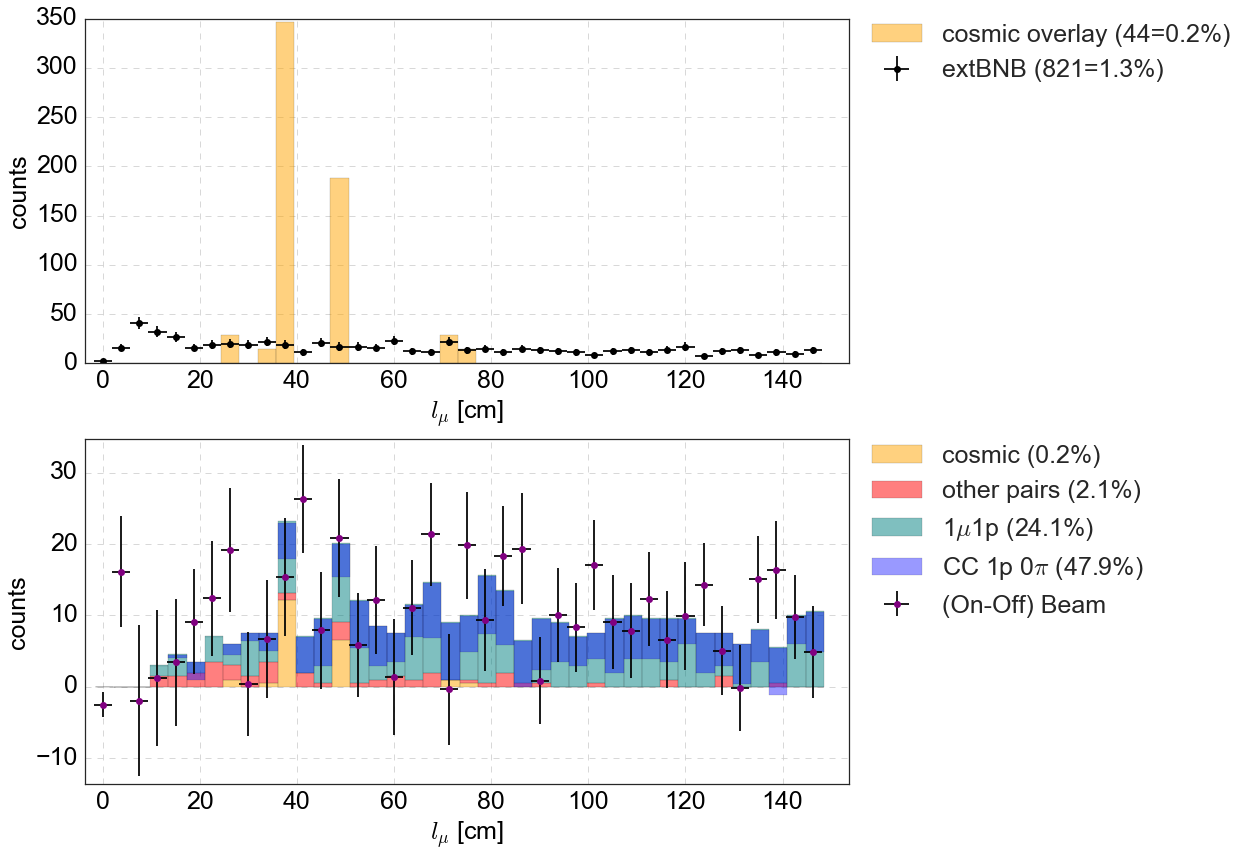

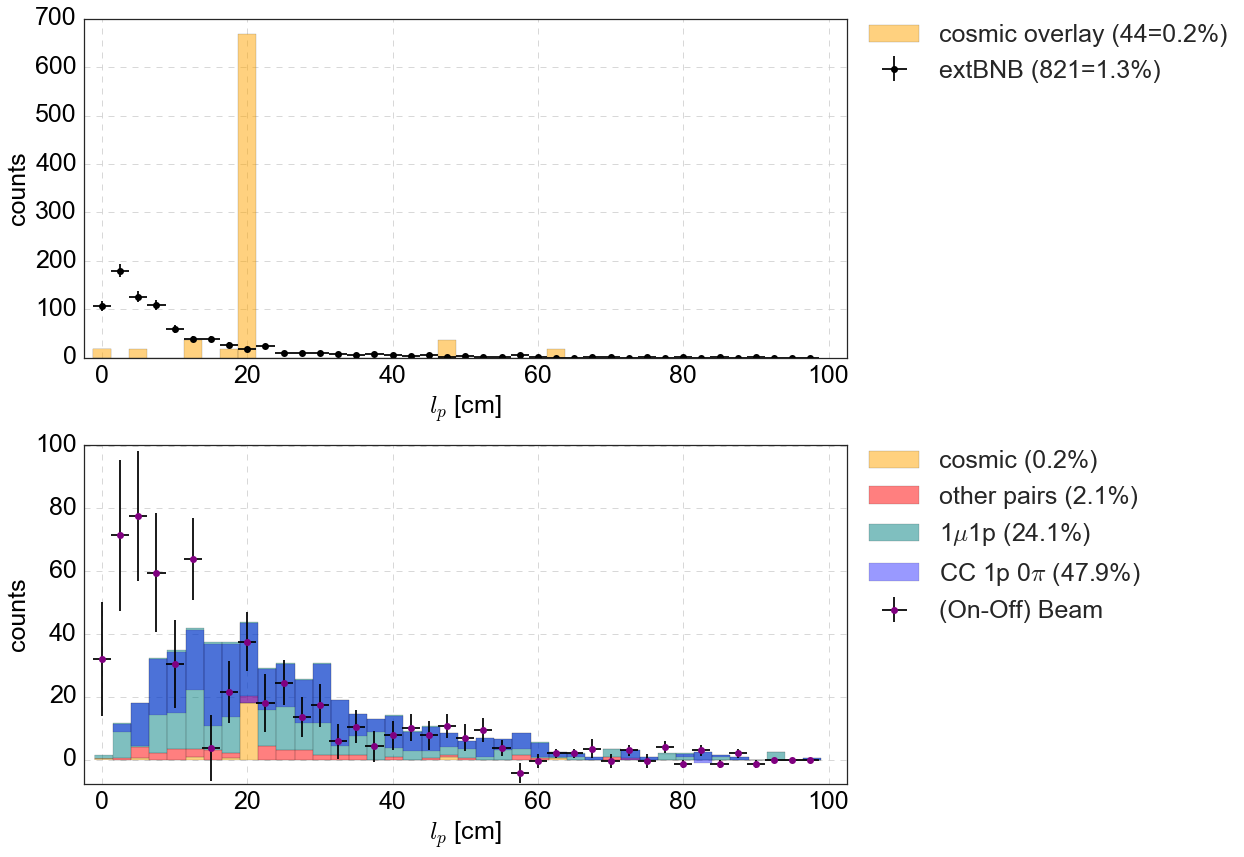

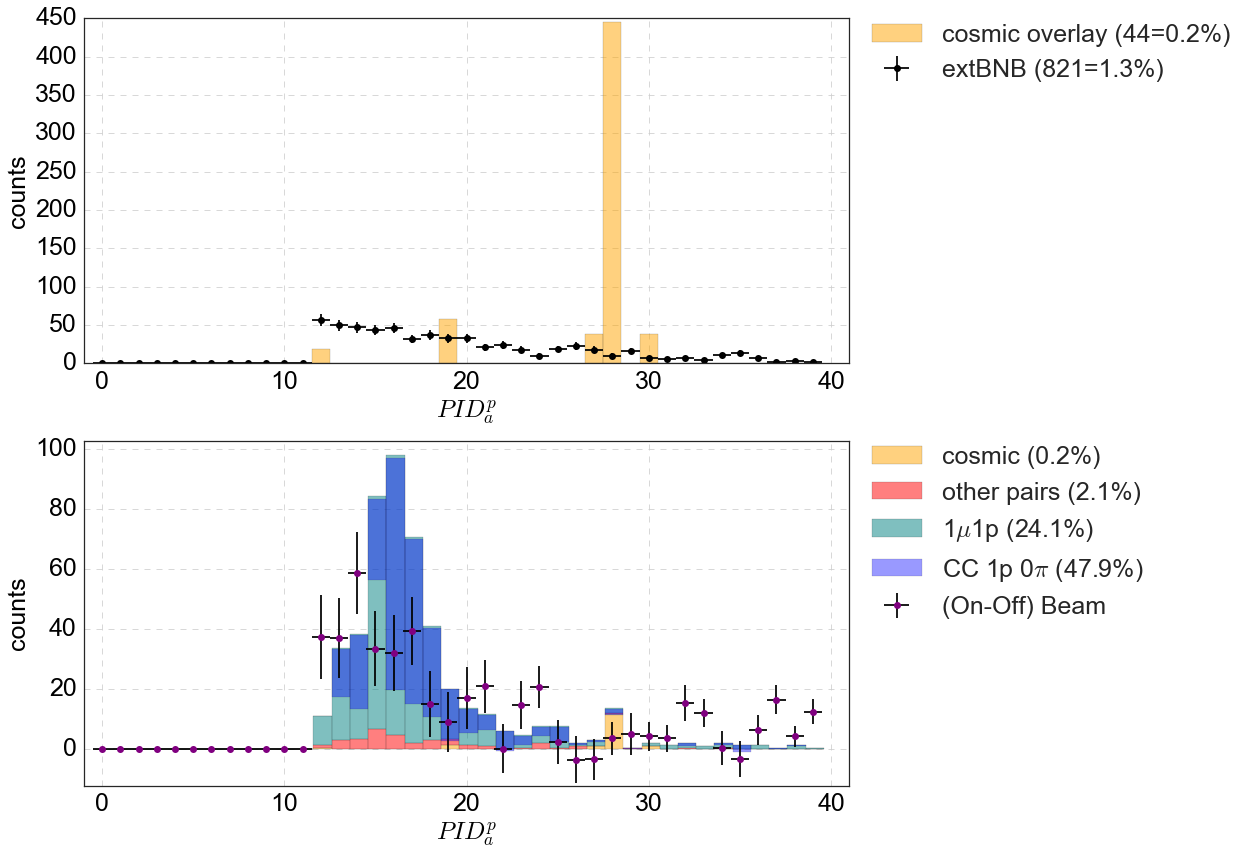

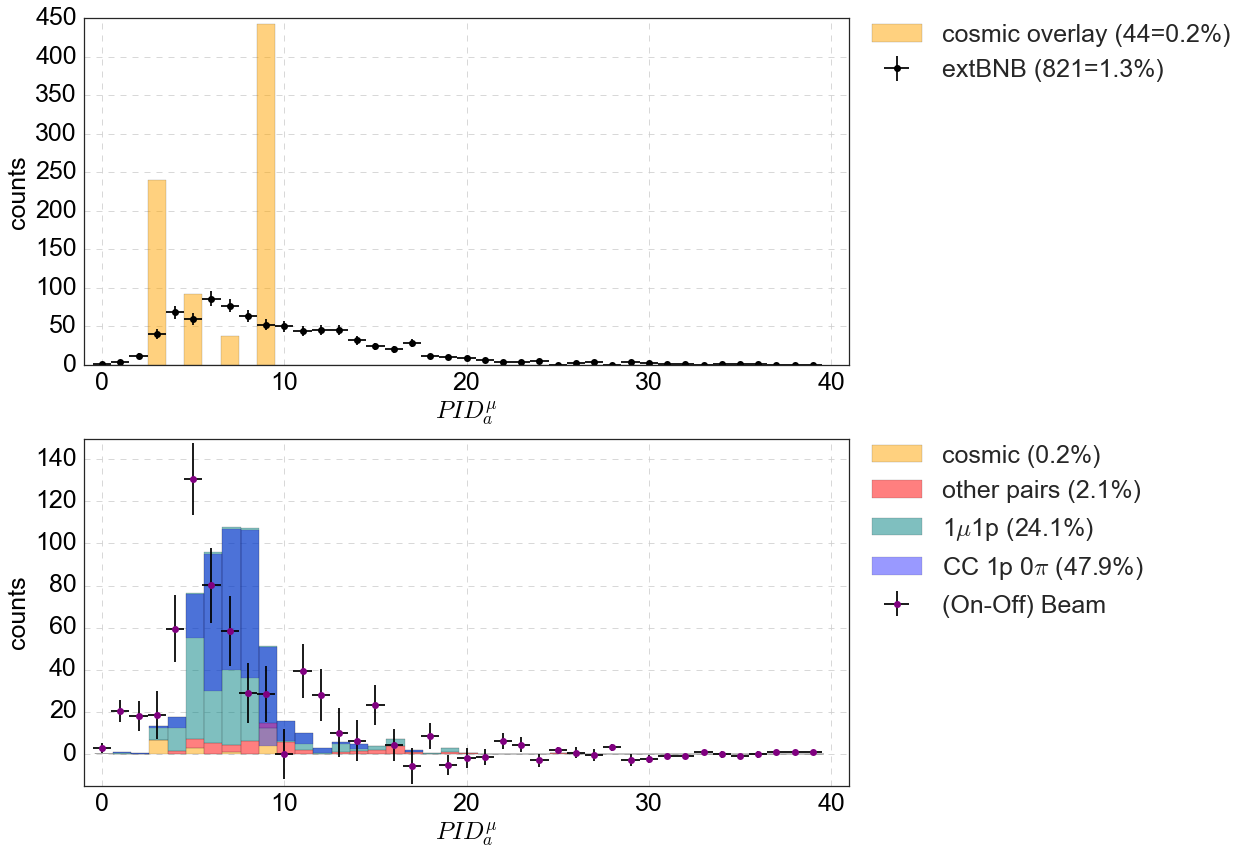

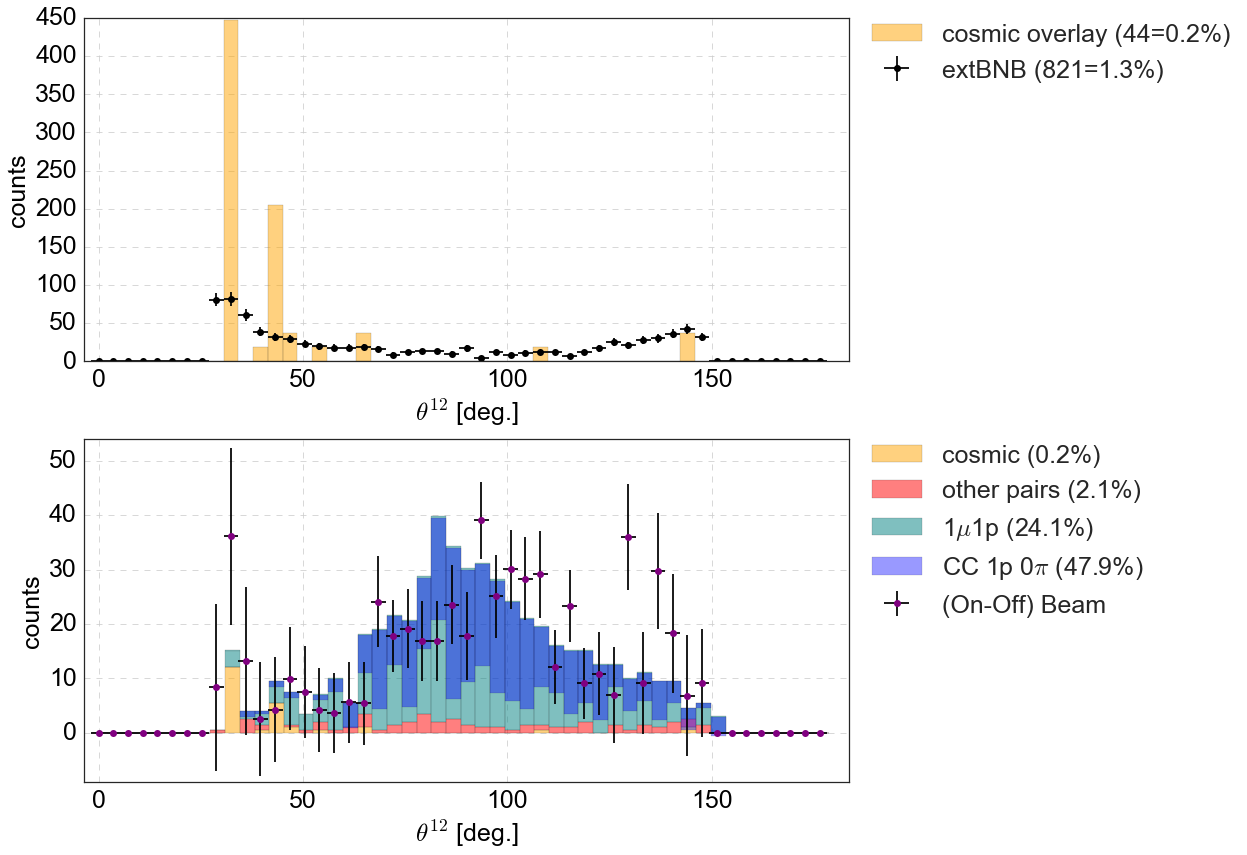

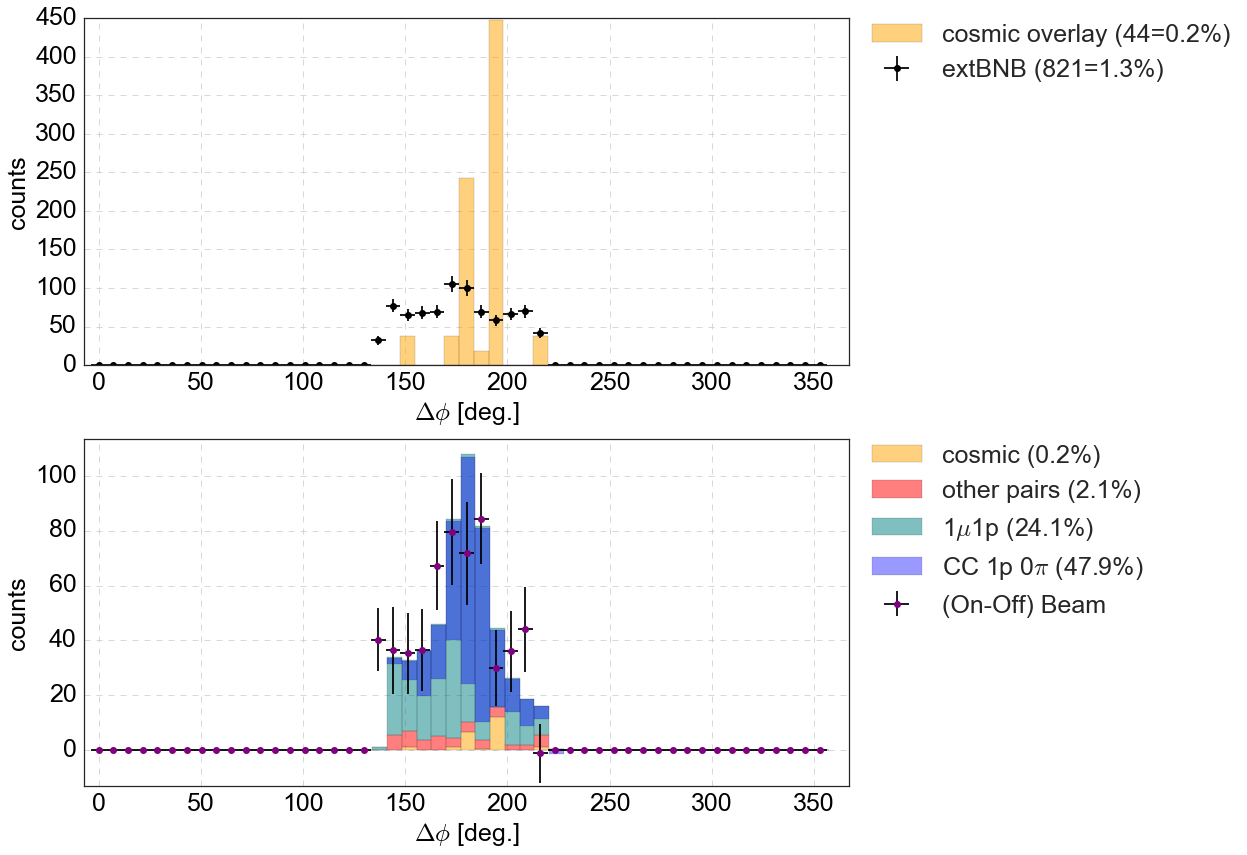

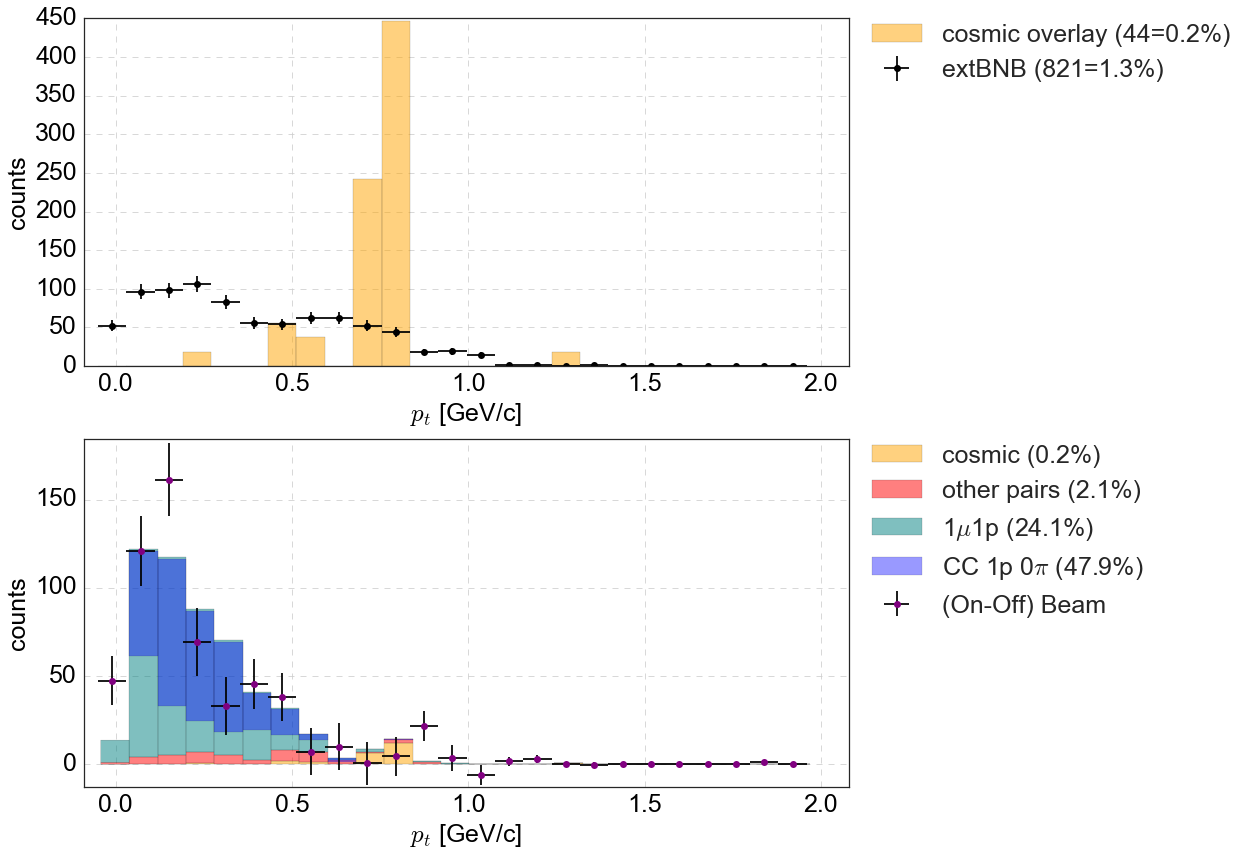

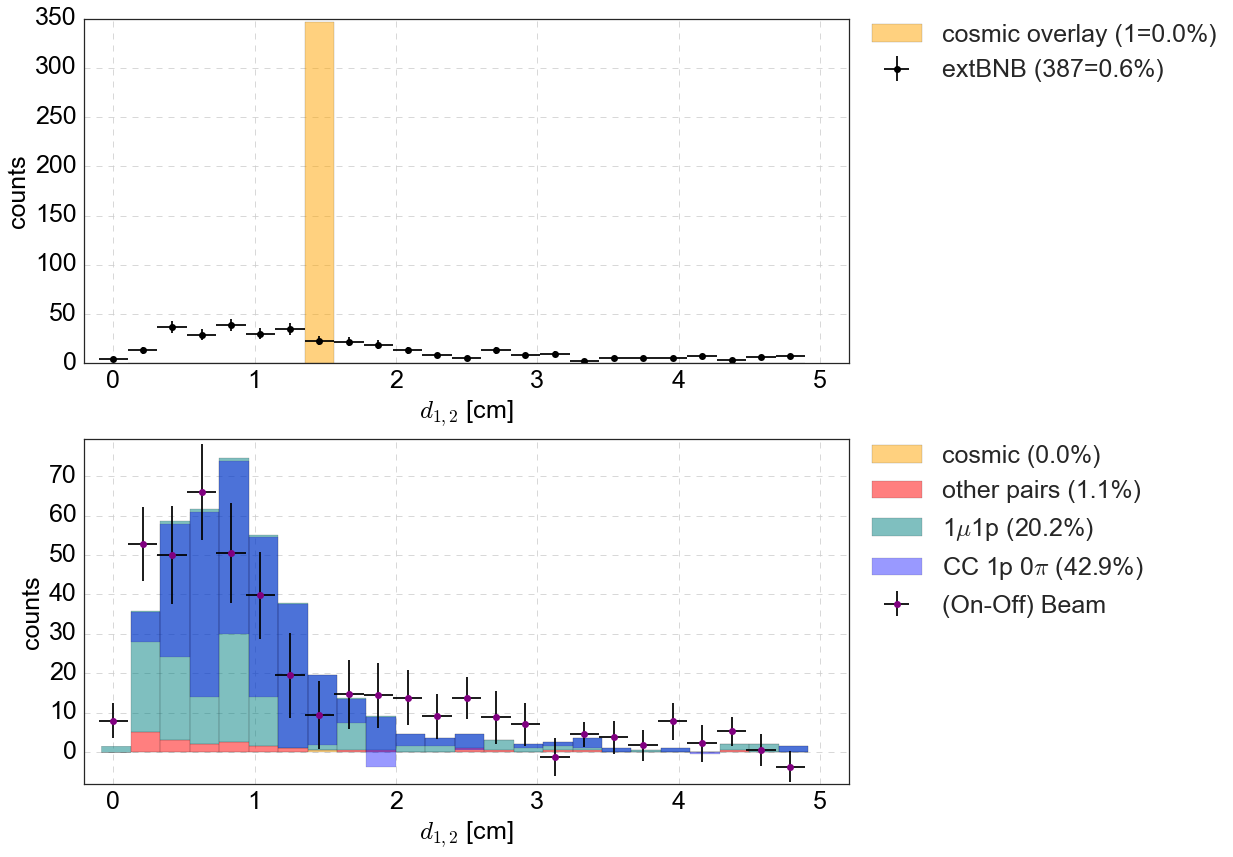

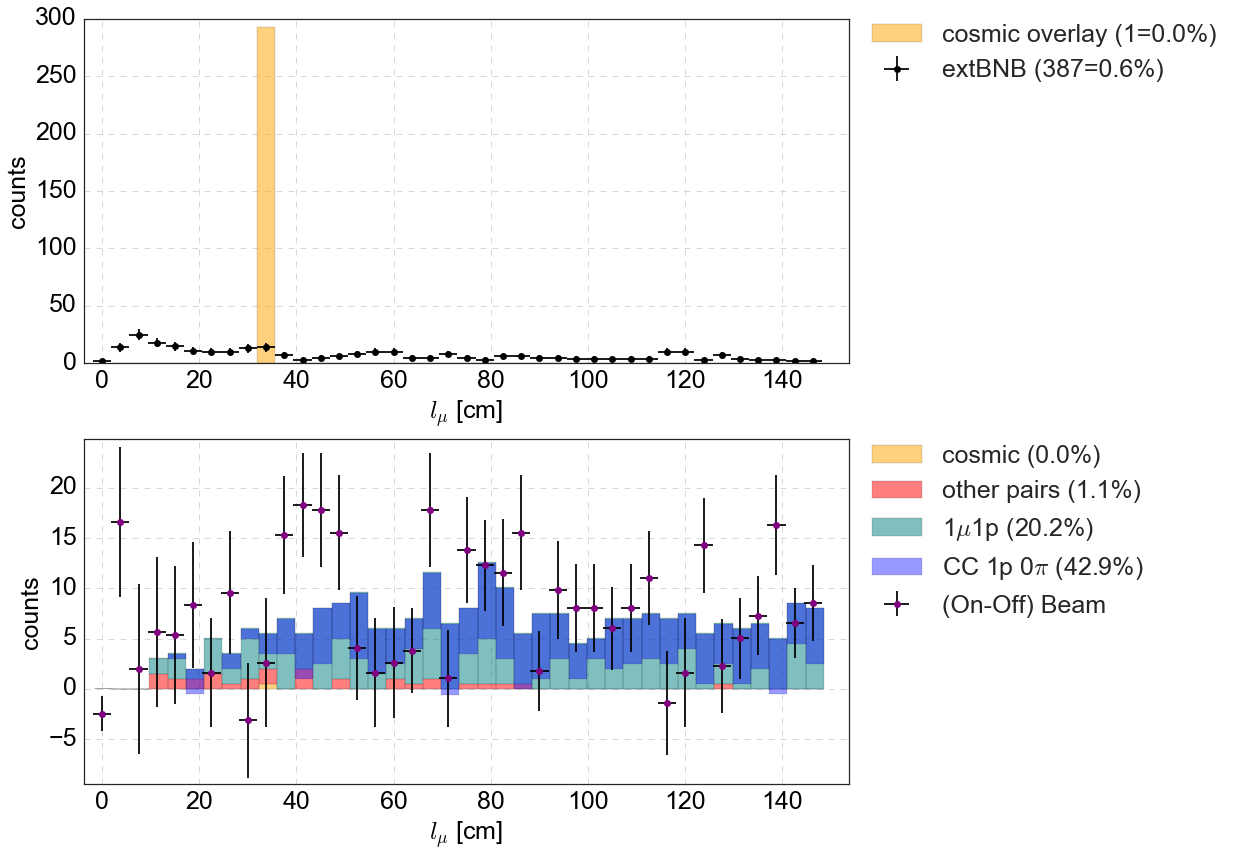

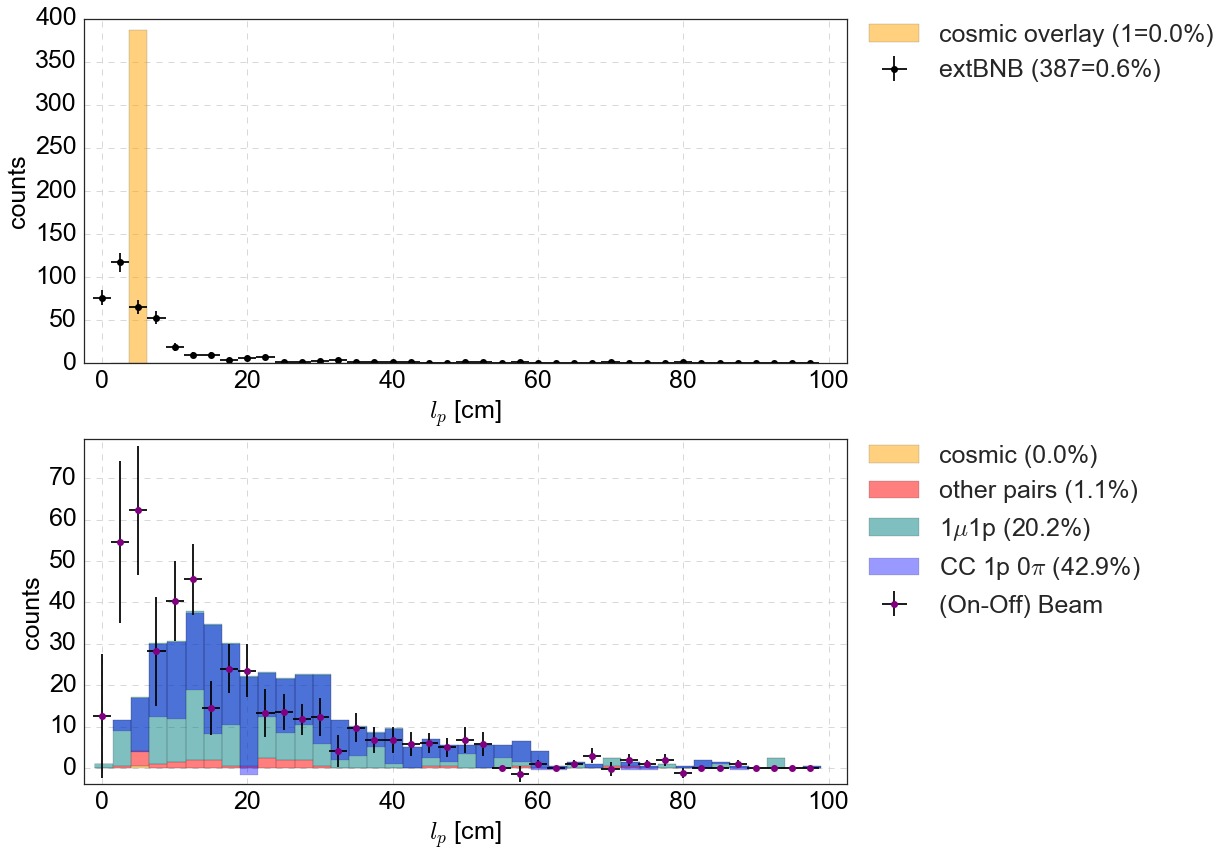

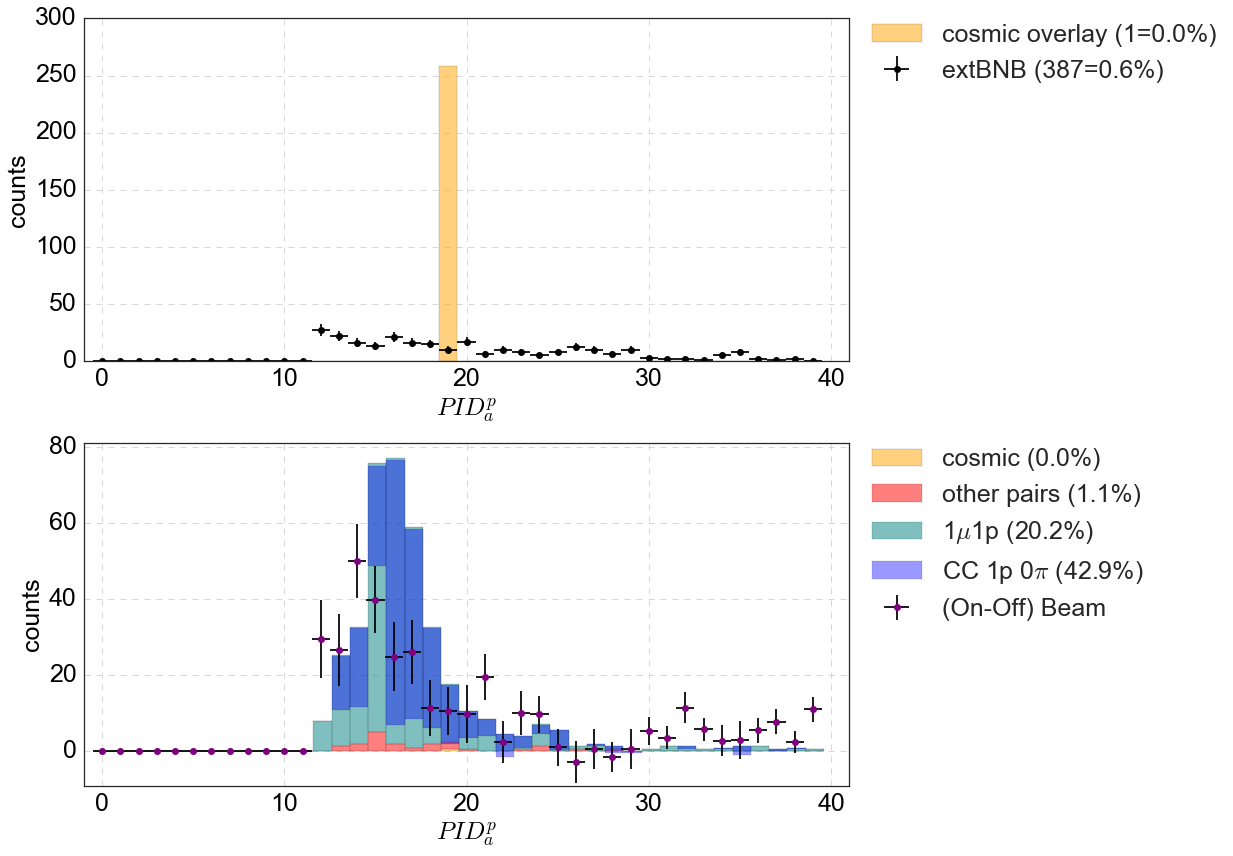

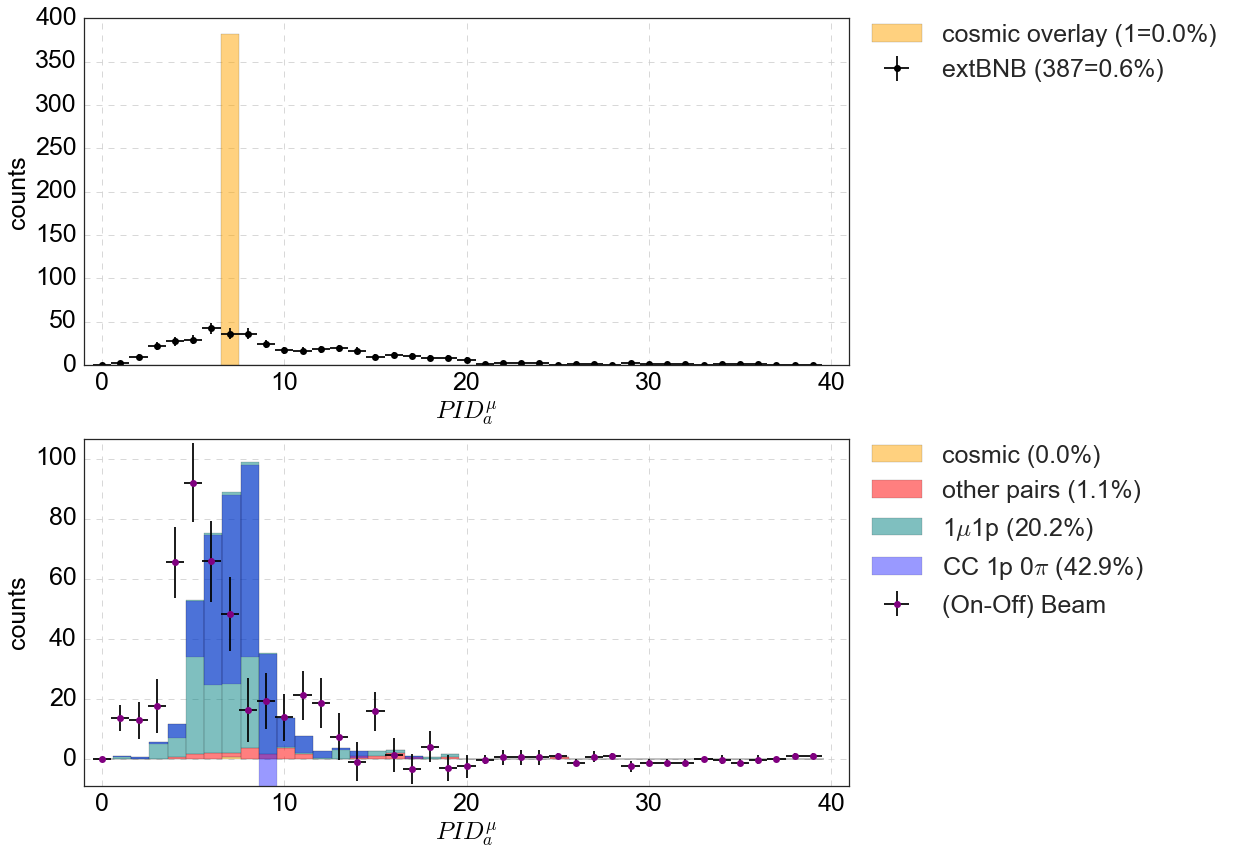

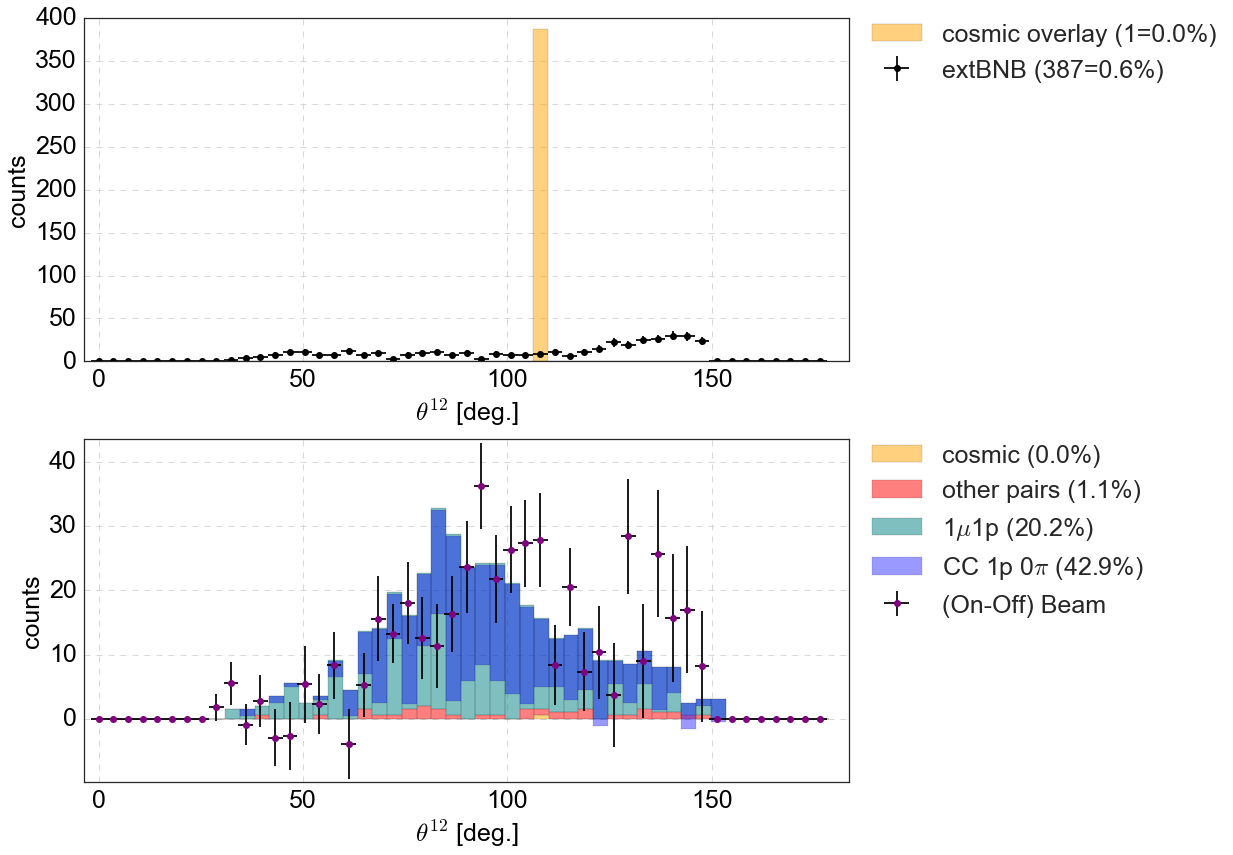

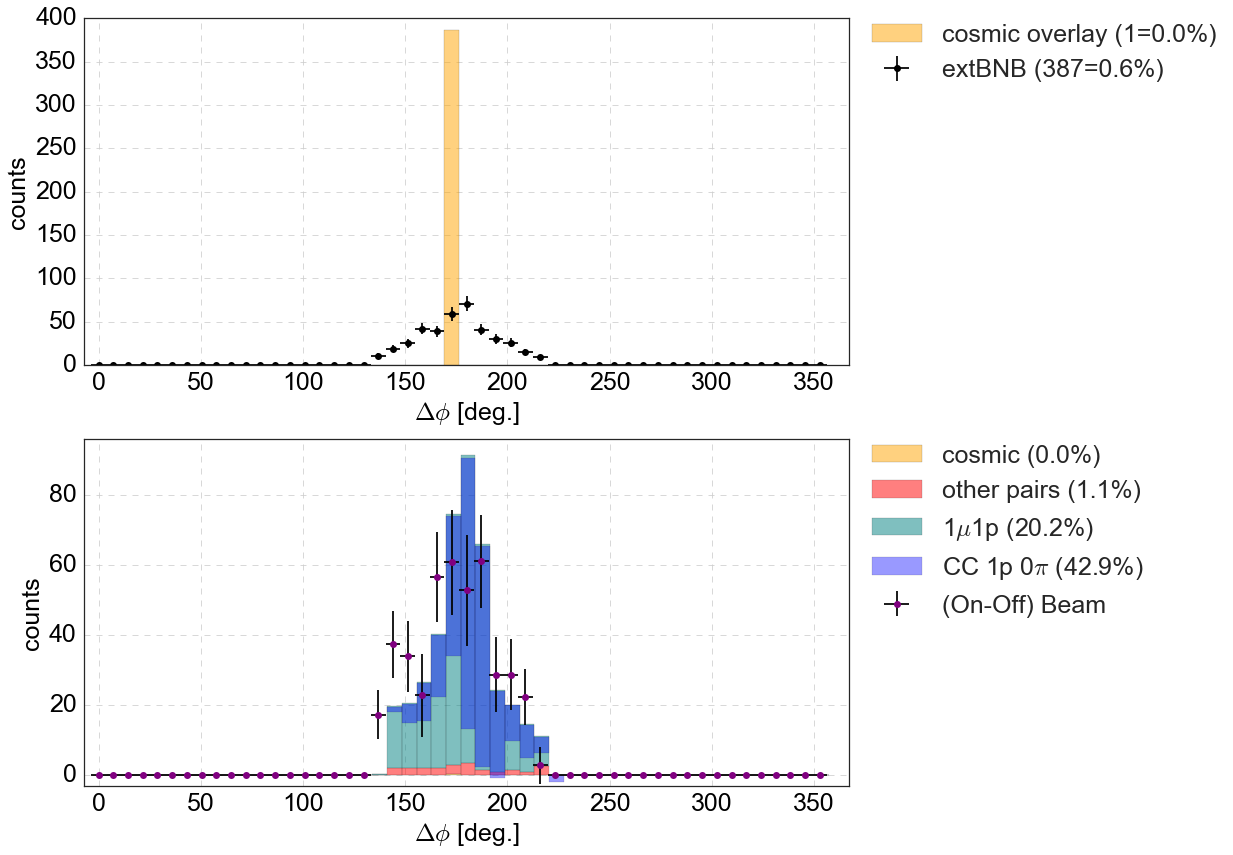

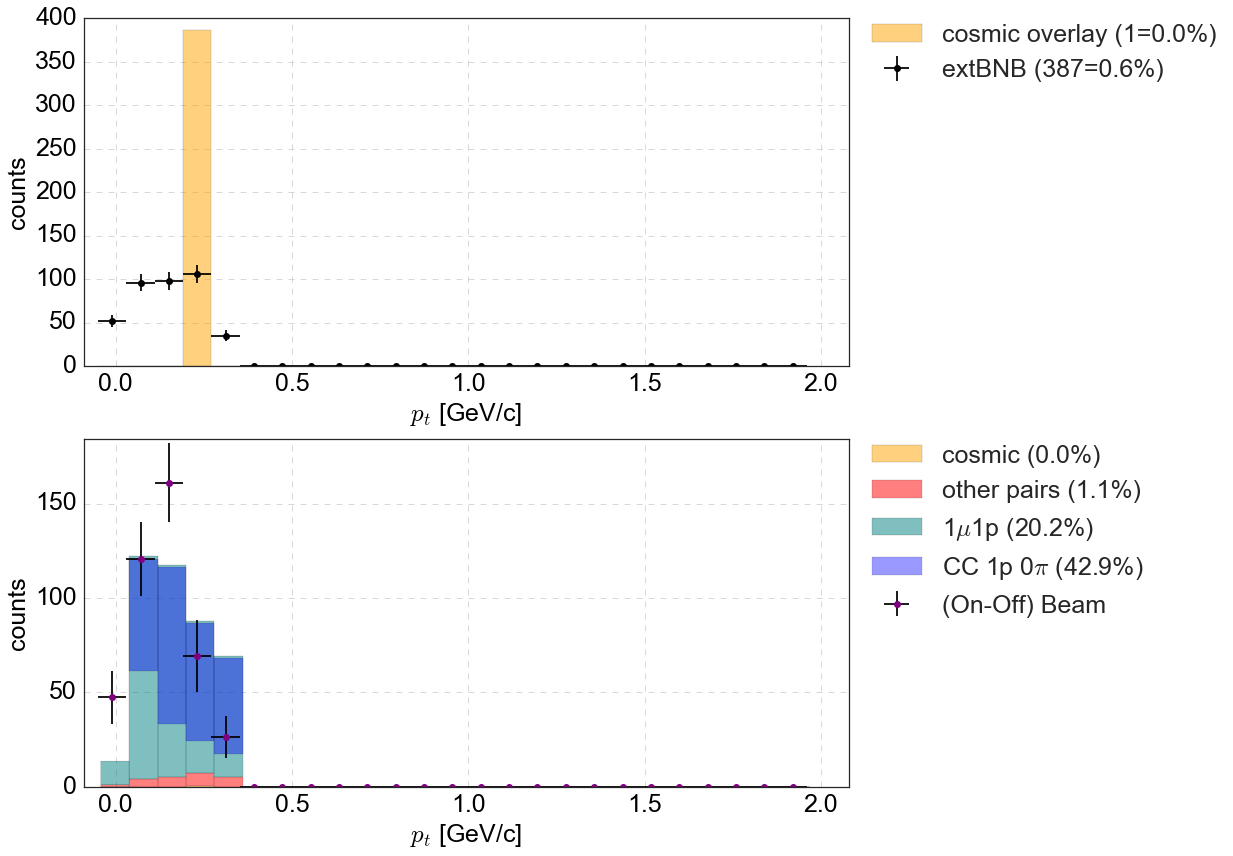

In [26]:
for cut_name in ['PIDa','length','non-collinearity','vertex activity','delta phi','soft Pt']:
    for var,x_label,bins in zip(['distance','l_assigned_muon','l_assigned_proton','PIDa_assigned_proton','PIDa_assigned_muon','theta_12','delta_phi','reco_Pt']                                      
                                ,['$d_{1,2}$ [cm]',r'$l_{\mu}$ [cm]',r'$l_{p}$ [cm]',r'$PID_a^{p}$',r'$PID_a^{\mu}$',r'$\theta^{12}$ [deg.]',r'$\Delta \phi$ [deg.]','$p_{t}$ [GeV/c]']
                                ,[np.linspace(0,5,25),np.linspace(0,150,41),np.linspace(0,100,41),np.linspace(0,40,41),np.linspace(0,40,41),np.linspace(0,180,51),np.linspace(0,360,51),np.linspace(-0.01,2,26)]):
        fig = plt.figure(figsize=(12,12))

        ax = fig.add_subplot(2,1,1)
        ax,leg=extBNBvsCosmicOverlay(OffBeamSample=reduced_OffBeam[cut_name], OffBeamFV=OffBeamFV
                          ,cosmic_overlay_sample = reduced_MCbnbDATAcosmicSamples[cut_name]['cosmic']
                          ,var=var , color='black' ,x_label=x_label, bins=bins , ax=ax, legend_loc='bbox')

        ax = fig.add_subplot(2,1,2)
        ax,leg=OnBeam_minus_OffBeam_1d(OnBeamSample=reduced_OnBeam[cut_name] 
                            ,OffBeamSample=reduced_OffBeam[cut_name] 
                            ,MCsamples=reduced_MCbnbDATAcosmicSamples[cut_name], MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
                            ,var=var , x_label=x_label ,bins=bins  , ax=ax, legend_loc='bbox')

        plt.savefig(figures_path+var+'_'+'after_cut_'+cut_name+'.pdf', bbox_inches='tight')